In [4]:
import glob,os
import pickle
import pandas as pd
import numpy as np
import datetime
##daily_return merge

In [1]:
cols=['申请人', '申请号', '公开（公告）日', '申请日', 'IPC主分类','IPC', 'CPC',
    '国民经济分类', '新兴产业分类',
    '申请人(翻译)',  '标准化申请人', '标准化当前权利人', '当前权利人', '第一申请人', '申请人数量',
    '申请人类型', '申请人地址', '申请人省市代码', '中国申请人地市', '中国申请人区县',
    '当前专利权人地址', '公开类型', '专利类型', '发明人数量', '引证次数', '转让次数',
    '标题 (中文)','预估到期日','首权字数','文献页数','文献种类代码','专利有效性','当前法律状态','工商企业状态',
    '合享价值度','保护范围', '技术先进性','技术稳定性',
    '权利要求数量', '独立权利要求数量', '从属权利要求数量', '简单同族个数', '扩展同族个数','DocDB同族个数',
    '被引证次数','自引次数', '被自引次数','他引次数','被他引次数','家族引证次数','家族被引证次数']

In [2]:
# path=r'金融科技公司数据汇总讨论/专利/'
# file=glob.glob(os.path.join(path, "*.xlsx"))
# dl_patent_1 = pd.DataFrame()
# for f_patent in file:
# #     count=count+pd.read_excel(f,index_col=None)['Stkcd'].count()
#     # dl=pd.concat([dl,pd.read_excel(f)[['申请人','标准化申请人','标准化当前权利人','第一申请人','申请人数量','申请人类 型','申请号','公开（公告）日','申请日','IPC主分类','IPC','洛迦诺分类号','EC','CPC','UC','FI','F-term','国民经济分类','新兴产业分类']]])

#     # dl_patent_1 = pd.concat([dl_patent_1,pd.read_excel(f_patent)[['申请人','申请号','公开（公告）日','申请日','IPC主分类','IPC','洛迦诺分类号','EC','CPC','UC','FI','F-term','国民经济分类','新兴产业分类',
#     # '申请人(翻译)','申请人(其他)','标准化申请人','标准化当前权利人','当前权利人','第一申请人','申请人数量','申请人类型','申请人地址','申请人地址(其他)',
#     # '申请人省市代码','中国申请人地市','中国申请人区县','当前专利权人地址' ,'公开类型', '专利类型','发明人数量','引证次数','转让次数']]])

#     print(f_patent)
#     dl_patent_1 = pd.concat([dl_patent_1,pd.read_excel(f_patent,usecols=cols)])

金融科技公司数据汇总讨论/专利\2023-09-14 (1).xlsx


C:\Users\Prime\AppData\Roaming\Python\Python39\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


金融科技公司数据汇总讨论/专利\2023-09-14.xlsx


C:\Users\Prime\AppData\Roaming\Python\Python39\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:
from sqlalchemy import create_engine,text
engine = create_engine('mysql+pymysql://d:7@10.10.10.5:3306/kettle?charset=utf8')  
conn = engine.connect()
conn.execute(text("describe 专利202309;")).fetchall()

[('序号', 'bigint unsigned', 'NO', 'PRI', None, ''),
 ('标题 (中文)', 'text', 'YES', '', None, ''),
 ('标题 (英文)', 'text', 'YES', '', None, ''),
 ('摘要 (中文)', 'text', 'YES', '', None, ''),
 ('摘要 (英文)', 'text', 'YES', '', None, ''),
 ('申请人', 'text', 'YES', '', None, ''),
 ('公开（公告）号', 'tinytext', 'YES', '', None, ''),
 ('公开（公告）日', 'datetime', 'YES', '', None, ''),
 ('申请号', 'tinytext', 'YES', '', None, ''),
 ('申请日', 'datetime', 'YES', '', None, ''),
 ('公开类型', 'tinytext', 'YES', '', None, ''),
 ('专利类型', 'tinytext', 'YES', '', None, ''),
 ('公开国别', 'tinytext', 'YES', '', None, ''),
 ('链接到incoPat', 'text', 'YES', '', None, ''),
 ('标题（小语种原文）', 'text', 'YES', '', None, ''),
 ('摘要（小语种原文）', 'text', 'YES', '', None, ''),
 ('首项权利要求', 'mediumtext', 'YES', '', None, ''),
 ('首权翻译', 'mediumtext', 'YES', '', None, ''),
 ('独立权利要求', 'text', 'YES', '', None, ''),
 ('权利要求数量', 'double', 'YES', '', None, ''),
 ('独立权利要求数量', 'double', 'YES', '', None, ''),
 ('从属权利要求数量', 'double', 'YES', '', None, ''),
 ('文献页数', 'double'

In [20]:
%%time
s_cols='`'+'`,`'.join(cols)+'`'
dl_patent_1 = pd.read_sql(f'select {s_cols}  from 专利202309', con=engine)
    
engine.dispose()
conn.close()

CPU times: total: 11.8 s
Wall time: 11.9 s


In [21]:
dl_patent_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113090 entries, 0 to 113089
Data columns (total 51 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   申请人        113090 non-null  object        
 1   申请号        113089 non-null  object        
 2   公开（公告）日    113090 non-null  datetime64[ns]
 3   申请日        113088 non-null  datetime64[ns]
 4   IPC主分类     105511 non-null  object        
 5   IPC        105590 non-null  object        
 6   CPC        85225 non-null   object        
 7   国民经济分类     113062 non-null  object        
 8   新兴产业分类     95951 non-null   object        
 9   申请人(翻译)    97713 non-null   object        
 10  标准化申请人     113081 non-null  object        
 11  标准化当前权利人   112622 non-null  object        
 12  当前权利人      113090 non-null  object        
 13  第一申请人      112969 non-null  object        
 14  申请人数量      113090 non-null  int64         
 15  申请人类型      93179 non-null   object        
 16  申请人地址      113007 no

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# dl为投融资数据
dl=pd.read_excel('data\\内地金融科技企业投融资数据_清洗版.xlsx',sheet_name="Sheet1")
# dl_invest = dl[['序号', '公司全称', '公司名', '简介', '烯牛行业（一级）', '成立时间', '地区','最新融资时间', '最新融资轮次',
#        '最新融资金额', '投资方','投资时间', '投资轮次名称', '转换后投资金额', '投资方.1', '成员名']]
dl_invest = dl[['序号', '公司全称', '公司名', '简介', '烯牛行业（一级）', '最新融资时间', '最新融资轮次',
       '最新融资金额', '投资方','投资时间', '投资轮次名称', '转换后投资金额', '投资方.1', '成员名']]
dl_invest['投资时间']=pd.to_datetime(dl_invest.投资时间,format='%Y-%m-%d')
dl_invest['最新融资时间']=pd.to_datetime(dl_invest.最新融资时间,format='%Y-%m-%d')

In [5]:
dl_invest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3371 entries, 0 to 3370
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   序号        358 non-null    float64       
 1   公司全称      358 non-null    object        
 2   公司名       322 non-null    object        
 3   简介        310 non-null    object        
 4   烯牛行业（一级）  312 non-null    object        
 5   最新融资时间    259 non-null    datetime64[ns]
 6   最新融资轮次    259 non-null    object        
 7   最新融资金额    259 non-null    object        
 8   投资方       231 non-null    object        
 9   投资时间      1118 non-null   datetime64[ns]
 10  投资轮次名称    1118 non-null   object        
 11  转换后投资金额   1118 non-null   object        
 12  投资方.1     1030 non-null   object        
 13  成员名       1361 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(11)
memory usage: 368.8+ KB


In [6]:
#查看空行,由于选了部分列
mask_nan=dl_invest.isna().all(axis=1)
mask_nan.sum()

1622

In [7]:
#删除空行
dl_invest.drop(index=dl_invest[mask_nan].index,inplace=True)

In [8]:
#序号=公司全称 无其他信息行
invest_info=dl_invest.iloc[:,~dl_invest.columns.isin(['序号','公司全称'])]#dl_invest.columns!='公司全称'
mask_nan_o=invest_info.isna().all(axis=1)#invest_info.count(axis=1)==0
mask_nan_o.sum()

36

In [9]:
#dl_invest_nan:36无信息公司
dl_invest_nan=dl_invest[mask_nan_o]
dl_invest.drop(index=dl_invest[mask_nan_o].index,inplace=True)
dl_invest.公司全称.value_counts()

公司全称
蚂蚁科技集团股份有限公司          2
众安在线财产保险股份有限公司        2
融联易云金融信息服务（北京）有限公司    1
北京思图场景数据科技服务有限公司      1
慧择保险经纪有限公司            1
                     ..
天道金科股份有限公司            1
珠海金智维信息科技有限公司         1
北京市商汤科技开发有限公司         1
北京融世纪信息技术有限公司         1
招银云创信息技术有限公司          1
Name: count, Length: 320, dtype: int64

In [10]:
#填充序号,公司全称
dl_invest[['序号','公司全称']]=dl_invest[['序号','公司全称']].fillna(method='ffill',axis=0)
dl_invest.query("公司全称 in ['蚂蚁科技集团股份有限公司','众安在线财产保险股份有限公司']")

,序号,公司全称,公司名,简介,烯牛行业（一级）,最新融资时间,最新融资轮次,最新融资金额,投资方,投资时间,投资轮次名称,转换后投资金额,投资方.1,成员名
0,1.0,蚂蚁科技集团股份有限公司,Ant Design,企业产品设计服务平台,企业服务,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
20,6.0,蚂蚁科技集团股份有限公司,Ant Design,企业产品设计服务平台,企业服务,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
22,8.0,众安在线财产保险股份有限公司,众安保险,财险公司,金融,2017-09-28,IPO,未披露,NaN,2017-09-28,IPO,未披露,NaN,NaN
23,8.0,众安在线财产保险股份有限公司,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2016-03-01,B轮,未披露,盈港资本,NaN
24,8.0,众安在线财产保险股份有限公司,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2015-06-01,A轮,未披露,摩根士丹利，鼎晖投资，赛富投资基金，加德信,NaN
25,8.0,众安在线财产保险股份有限公司,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2014-06-15,Pre-A轮,未披露,中国平安，携程，腾讯投资，蚂蚁金服，锴明投资,NaN
26,8.0,众安在线财产保险股份有限公司,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2013-10-01,股权投资,未披露,锴明投资，携程，阿里巴巴，蚂蚁集团，平安创投，腾讯投资,NaN
2852,246.0,众安在线财产保险股份有限公司,众安保险,财险公司,金融,2017-09-28,IPO,未披露,NaN,2017-09-28,IPO,未披露,NaN,许炜
2853,246.0,众安在线财产保险股份有限公司,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2016-03-01,B轮,未披露,盈港资本,陈劲
2854,246.0,众安在线财产保险股份有限公司,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2015-06-01,A轮,未披露,摩根士丹利，鼎晖投资，赛富投资基金，加德信,欧亚平


In [11]:
#删重复公司
dl_invest.drop(index=[20,22,23,24,25,26],inplace=True)

In [12]:
(dl_invest.groupby(by='公司全称').投资时间.max()-dl_invest.groupby(by='公司全称').最新融资时间.min()).dt.days.sum()

0.0

In [13]:
#有投资信息的公司
invest_conmes=dl_invest[~dl_invest.最新融资时间.isna()].公司全称
invest_conmes.nunique()

258

In [14]:
#无融资信息公司
mask_nan_a=~dl_invest.公司全称.isin(invest_conmes)
mask_nan_a.sum()

78

In [15]:
#o+a 设置一个时间点，获取所有专利数据，以投资时间最大值做预测
dl_invest_nan=pd.concat([dl_invest_nan,dl_invest[mask_nan_a]])
na_date = dl_invest['投资时间'].max() + pd.offsets.MonthEnd(1) #+np.timedelta64(1,'D')
dl_invest_nan['投资时间'] = na_date
#删除没投资数据的
dl_invest=dl_invest[~mask_nan_a]
dl_invest.shape

(1629, 14)

In [16]:
#dl_patent_1.drop(['Conme','index','apply_date'],axis=1,inplace=True)
#(dl_patent_1['申请人'].str.split(';', expand=True).count(axis=1)!=dl_patent_1['申请人数 量']).sum()
#(dl_patent_1['发明人'].str.split(';', expand=True).count(axis=1)!=dl_patent_1['发明人数量']).sum()

In [17]:
#无空列
#(dl_patent_1.count(axis=1)==0).sum()
dl_patent_1.dropna(axis=1).columns#dl_patent_1.columns[dl_patent_1.count()==dl_patent_1.shape[0]]

Index(['申请人', '公开（公告）日', '公开类型', '专利类型', '当前权利人', '申请人数量', '专利有效性', '当前法律状态',
       '简单同族个数', '扩展同族个数', 'DocDB同族个数', '合享价值度', '技术稳定性', '技术先进性', '保护范围',
       '文献种类代码'],
      dtype='object')

In [18]:
dl_patent_1['apply_date']=pd.to_datetime(dl_patent_1['申请日'],format='%Y-%m-%d')

###split applicants 申请人不是unique的，有些申请人超过两个以上
dl_1=dl_patent_1.reset_index()
a=dl_1['申请人'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('申请人id')
dl_unstack=pd.merge(a,dl_1,left_index=True,right_index=True)
dl_unstack=dl_unstack.rename(columns={'申请人id':'Conme'})

## dl_patent
dl_patent = dl_unstack[dl_unstack['Conme'].isin(dl['公司全称'])]#dl_invest['公司全称']

In [19]:
#第一申请人：Conme
#dl_patent_2 = dl_1[dl_1['第一申请人'].isin(dl['公司全称'])]
(dl_unstack['Conme'].nunique(),
dl_unstack['第一申请人'].nunique(),
dl_1.shape,
dl_patent.shape,
(dl_patent['Conme']!=dl_patent['第一申请人']).sum(),
)

(1191, 767, (113090, 53), (43255, 54), 0)

In [20]:
#申请时间比较少,2002年前无
print(dl_invest.投资时间.min(),dl_invest.投资时间.max())
print(dl_patent.apply_date.min(),dl_patent.apply_date.max())

1994-04-08 00:00:00 2023-09-18 00:00:00
2000-08-22 00:00:00 2023-08-16 00:00:00


In [21]:
#有些公司无专利数据
mask_nan_b=~dl_invest.公司全称.isin(dl_patent['Conme'])
mask_nan_b.sum()
#set(dl_invest['公司全称'])-set(dl_patent['Conme'])

423

In [22]:
#o+a+b,无信息，无融资，无专利
dl_invest_nan=pd.concat([dl_invest_nan,dl_invest[mask_nan_b]])
dl_invest_nan.reset_index(drop=True,inplace=True)
dl_invest_nan.shape

(537, 14)

In [23]:
#增加一行投资时间，以当前最大时间获取全部专利信息做预测
dl_invest = dl_invest[~mask_nan_b]#删除无专利数据的
dl_invest_conme = dl_invest.loc[:,:'投资时间'].drop_duplicates('公司全称', keep='last').copy()
dl_invest_conme['投资时间'] = na_date
dl_invest = pd.concat([dl_invest, dl_invest_conme]).sort_index(kind='mergesort')
dl_invest.reset_index(drop=True,inplace=True)
dl_invest.shape

(1383, 14)

In [24]:
#dl_invest_round = dl_invest
dl_invest_round = pd.concat([dl_invest,dl_invest_nan]).sort_values(by=['序号','投资时间'])
dl_invest_round.reset_index(drop=True,inplace=True)
dl_invest_round.shape

(1920, 14)

In [25]:
#有重复申请号:6000
(dl_patent['申请号'].nunique(),
dl_patent['标题 (中文)'].nunique(),
dl_patent['IPC主分类'].nunique()
)

(35208, 31561, 2245)

In [26]:
def process_row_application_num(row, filter_table):
    filter_value = filter_table[(filter_table['apply_date']< row['投资时间'])&(filter_table['Conme'] == row['公司全称'])]
    application_number = filter_value['申请号'].nunique()
    return application_number

# 使用 apply() 调用自定义函数，并传入筛选条件的表格 filter_df
dl_invest_round['专利申请数量'] = dl_invest_round.apply(process_row_application_num, args=(dl_patent,), axis=1)

In [27]:
def patent_agg(df):
    return '; '.join(df.values)

def process_row_ipc_range(row, filter_table):
    filter_value = filter_table[(filter_table['apply_date']< row['投资时间'])&(filter_table['Conme'] == row['公司全称'])]
    ipc_range = filter_value['IPC主分类'].map(lambda x:x[:3]).nunique()
    return ipc_range

dl_patent_1 = dl_patent.dropna(subset=['IPC主分类','IPC'])
dl_invest_round['IPC数量'] = dl_invest_round.apply(process_row_ipc_range, args=(dl_patent_1,), axis=1)

In [28]:
def process_row_ipc_range(row, filter_table):
    filter_value = filter_table[(filter_table['apply_date']< row['投资时间'])&(filter_table['Conme'] == row['公司全称'])]
    ipc_range = filter_value['IPC主分类'].map(lambda x:x[:3]).nunique()
    filter_value_1 = filter_value.sort_values(by=['apply_date'],ascending=True)
    filter_value_1['累计申请时间']=filter_value_1['apply_date'].transform(lambda x: x - x.min())
    filter_value_1['累计申请时间_str'] = filter_value_1['累计申请时间'].astype(str)
    filter_value_1['累计申请时间_num'] = filter_value_1['累计申请时间_str'].str.extract('(\d+)').astype(int)
    filter_value_1['累计申请时间_year'] = (filter_value_1['累计申请时间_num']//365)+1
    # ipc_range_average = ipc_range/filter_value_1['累计申请时间_year'].max()
    ipc_year = filter_value_1['累计申请时间_year'].max()

    ipc_range_average = ipc_range/ipc_year
    return ipc_range_average

dl_patent_1 = dl_patent.dropna(subset=['IPC主分类','IPC'])
dl_invest_round['年申请专利平均IPC数_平均'] = dl_invest_round.apply(process_row_ipc_range, args=(dl_patent_1,), axis=1)
dl_invest_round['年申请专利平均IPC数_平均'] = dl_invest_round['年申请专利平均IPC数_平均'].fillna(0)

In [29]:
def process_row_inventor_num(row, filter_table):
    filter_value = filter_table[(filter_table['apply_date']< row['投资时间'])&(filter_table['Conme'] == row['公司全称'])]
    inventor_num = filter_value['发明人数量'].sum()
    return inventor_num
    
dl_patent_1 = dl_patent.dropna(subset=['发明人数量'])
dl_invest_round['发明人数量'] = dl_invest_round.apply(process_row_inventor_num, args=(dl_patent_1,), axis=1)

In [30]:
def process_row_inventor_num(row, filter_table):
    filter_value = filter_table[(filter_table['apply_date']< row['投资时间'])&(filter_table['Conme'] == row['公司全称'])]
    inventor_num = filter_value['发明人数量'].sum()
    filter_value_1 = filter_value.sort_values(by=['apply_date'],ascending=True)
    filter_value_1['累计申请时间']=filter_value_1['apply_date'].transform(lambda x: x - x.min())
    filter_value_1['累计申请时间_str'] = filter_value_1['累计申请时间'].astype(str)
    filter_value_1['累计申请时间_num'] = filter_value_1['累计申请时间_str'].str.extract('(\d+)').astype(int)
    filter_value_1['累计申请时间_year'] = (filter_value_1['累计申请时间_num']//365)+1
    # ipc_range_average = ipc_range/filter_value_1['累计申请时间_year'].max()
    inventor_year = filter_value_1['累计申请时间_year'].max()
    inventor_num_avg = inventor_num/inventor_year
    return inventor_num_avg
    
dl_patent_1 = dl_patent.dropna(subset=['发明人数量'])
dl_invest_round['年度发明人数量_平均'] = dl_invest_round.apply(process_row_inventor_num, args=(dl_patent_1,), axis=1)
dl_invest_round['年度发明人数量_平均'] = dl_invest_round['年度发明人数量_平均'].fillna(0)

In [31]:
def process_row_citation_num(row, filter_table):
    filter_value = filter_table[(filter_table['apply_date']< row['投资时间'])&(filter_table['Conme'] == row['公司全称'])]
    citation_num = filter_value['引证次数'].sum()
    return citation_num

dl_patent_1 = dl_patent.dropna(subset=['引证次数'])
dl_invest_round['引证次数'] = dl_invest_round.apply(process_row_citation_num, args=(dl_patent_1,), axis=1)

In [32]:
#定义通用筛选函数,获取筛选后的表，或者去空的列，或者聚合的值
def process_filter_value(row,filter_table,cols = '',func = None,filter_date = True):
    filter_value=filter_table[((filter_table['apply_date'] < row['投资时间']) | (not filter_date))&
                                (filter_table['Conme'] == row['公司全称'])] #(filter_table[cols].notnull()) &
    if not cols:
        return filter_value
    if not func: #'mode','unique','nunique','mean'
        return  filter_value.dropna(subset = cols) # any empty:empty
    return filter_value[cols].dropna().agg(func)  # empty:0

In [33]:
#时间间隔日计算
def sort_apply_date_interval(filter_value):
    filter_value_1 = filter_value.sort_values(by=['apply_date'],ascending=True)
    filter_value_1['累计申请时间'] = (filter_value_1['apply_date']-filter_value_1['apply_date'].min()).dt.days
    return filter_value_1['累计申请时间']

In [34]:
def process_row_avg_num(row, filter_table,col,filter_date = True):
    filter_value = process_filter_value(row,filter_table,col,None,filter_date)
    inventor_year = (sort_apply_date_interval(filter_value)//365).max()+1
    return filter_value[col].sum()/inventor_year

dl_invest_round['年度引证次数_平均'] = dl_invest_round.apply(process_row_avg_num, args=(dl_patent,'引证次数',), axis=1).fillna(0)

In [35]:
dl_invest_round['转让次数']=dl_invest_round.apply(process_filter_value, args=(dl_patent,'转让次数',sum), axis=1)
dl_invest_round['累计投资时间'] = dl_invest_round.groupby('公司全称')['投资时间'].transform(lambda x: (x - x.min()).dt.days) # 间隔：transform(lambda x: (x - x.shift(1)).dt.days)
dl_invest_round['累计投资次数'] = dl_invest_round.groupby('公司全称')['投资时间'].transform(lambda x: x.rank(method='first')) #.cumcount() + 1 ,(~x.isna()).cumsum()

In [36]:
dl_invest_round['投资方.2']=dl_invest_round['投资方.1'].str.replace('，|,|、',";", regex=True).replace('\t|领投|跟投|等',"", regex=True)
dl_invest_round['投资方数量']=dl_invest_round.groupby(by='公司全称')['投资方.2'].transform(lambda x:x.str.split(';',expand=True).count(axis=1))
dl_invest_round['累计投资方数量']=dl_invest_round.groupby(by='公司全称')['投资方数量'].transform(lambda x:x.replace(0,np.nan).cumsum())

In [37]:
dl_invest_round[['投资时间','累计投资时间','累计投资次数','累计投资方数量','投资方数量','投资方.2']].dropna(how='all')

,投资时间,累计投资时间,累计投资次数,累计投资方数量,投资方数量,投资方.2
0,2023-09-30,0.0,1.0,NaN,0,NaN
1,2015-05-01,0.0,1.0,1.0,1,广发信德
2,2017-01-01,611.0,2.0,4.0,3,考拉基金;华西股份;横琴金投产业投资基金管理
3,2020-12-25,2065.0,3.0,5.0,1,考拉基金
4,2021-10-08,2352.0,4.0,7.0,2,斯扬道（天津）科技发展合伙企业（有限合伙）;广发乾和
...,...,...,...,...,...,...
1915,2023-09-30,2564.0,4.0,NaN,0,NaN
1916,2023-09-30,0.0,1.0,NaN,0,NaN
1917,2016-07-07,0.0,1.0,3.0,3,华创资本;翊翎资本;宜信
1918,2017-07-25,383.0,2.0,NaN,0,NaN


In [38]:
#投资时间-申请时间
def process_row_date_diff(row, filter_table,col):
    filter_value = process_filter_value(row,filter_table,col)
    filter_value['date_diff']=(row['投资时间']-filter_value[col]).dt.days
    return filter_value['date_diff'].mean()/365

dl_invest_round['专利年龄']=dl_invest_round.apply(process_row_date_diff, args=(dl_patent,'apply_date'), axis=1)

In [39]:
dl_patent['预估到期日']=pd.to_datetime(dl_patent['预估到期日'].astype(str).str[:-2],format='%Y%m%d',errors='coerce') #.str.extract('(\d+)')[0]
dl_patent['专利期限']=(dl_patent['预估到期日']-dl_patent['apply_date']).dt.days
dl_patent['专利期限'].value_counts()

专利期限
7305.0    38876
3652.0     1599
3653.0     1495
5479.0     1215
9131.0        7
Name: count, dtype: int64

In [40]:
#'预估到期日'-投资时间
dl_invest_round['剩余期限']=-dl_invest_round.apply(process_row_date_diff, args=(dl_patent,'预估到期日'), axis=1)

In [41]:
#'公开（公告）日', '申请日', '许可合同备案日期', '优先权日', '最早优先权日', '首次公开日', '授权公告日','工商成立日期', '复审无效决定日', '转让执行日', '复审决定日', '口审日期', '转让登记日'
dl_patent.select_dtypes('datetime').describe()
#'申请日'<'首次公开日'<='公开（公告）日'<='授权公告日'
#'优先权日'='最早优先权日'
#'失效日'<='预估到期日'

,公开（公告）日,申请日,预估到期日,apply_date
count,43255,43255,43192,43255
mean,2021-03-03 19:15:47.710091264,2020-04-19 17:25:56.102184704,2039-06-10 13:53:53.265419264,2020-04-19 17:25:56.102184704
min,2001-05-16 00:00:00,2000-08-22 00:00:00,2010-08-22 00:00:00,2000-08-22 00:00:00
25%,2020-02-28 00:00:00,2018-12-25 00:00:00,2038-06-28 00:00:00,2018-12-25 00:00:00
50%,2021-07-16 00:00:00,2020-09-23 00:00:00,2040-05-29 00:00:00,2020-09-23 00:00:00
75%,2022-08-23 00:00:00,2021-12-07 00:00:00,2041-10-14 00:00:00,2021-12-07 00:00:00
max,2023-09-12 00:00:00,2023-08-16 00:00:00,2045-04-28 00:00:00,2023-08-16 00:00:00


In [42]:
#具体patent process_filter_value测试  and 投资时间=="2021-12-30"
dl_invest_round.query('公司全称=="北京市商汤科技开发有限公司"').apply(process_filter_value, args=(dl_patent,'',None,False), axis=1).iloc[0]

,Conme,index,标题 (中文),申请人,公开（公告）日,申请号,申请日,公开类型,专利类型,权利要求数量,...,扩展同族个数,DocDB同族个数,合享价值度,技术稳定性,技术先进性,保护范围,文献种类代码,预估到期日,apply_date,专利期限
17,北京市商汤科技开发有限公司,17,一种目标跟踪方法、装置、设备及存储介质,北京市商汤科技开发有限公司,2023-09-12,CN202010035192.5,2020-01-14,发明授权,发明授权,12.0,...,2,2,8,9,1,8,B,2040-01-14,2020-01-14,7305.0
28,北京市商汤科技开发有限公司,28,文字识别方法及装置、存储介质,北京市商汤科技开发有限公司,2023-09-12,CN202011111198.2,2020-10-16,发明授权,发明授权,10.0,...,2,2,8,9,5,7,B,2040-10-16,2020-10-16,7305.0
30,北京市商汤科技开发有限公司,30,图像处理方法及装置、电子设备及存储介质,北京市商汤科技开发有限公司,2023-09-12,CN202011540522.2,2020-12-23,发明授权,发明授权,12.0,...,2,2,8,9,5,8,B,2040-12-23,2020-12-23,7305.0
36,北京市商汤科技开发有限公司,36,图像处理方法及装置、电子设备和存储介质,北京市商汤科技开发有限公司,2023-09-12,CN202110844476.3,2021-07-26,发明授权,发明授权,12.0,...,2,2,8,9,2,8,B,2041-07-26,2021-07-26,7305.0
58,北京市商汤科技开发有限公司,58,移动机器人控制方法、移动机器人及相关产品,北京市商汤科技开发有限公司,2023-09-12,CN202310382948.7,2023-04-11,发明申请,发明申请,11.0,...,1,1,7,4,4,7,A,2043-04-11,2023-04-11,7305.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106099,北京市商汤科技开发有限公司,46099,人脸考勤广告机,北京市商汤科技开发有限公司,2016-01-13,CN201520483131.X,2015-07-07,实用新型,实用新型,7.0,...,1,1,9,8,7,6,U,2025-07-07,2015-07-07,3653.0
106895,北京市商汤科技开发有限公司,46895,身份认证设备,北京市商汤科技开发有限公司,2015-11-18,CN201520193445.6,2015-04-01,实用新型,实用新型,11.0,...,1,1,9,8,7,7,U,2025-04-01,2015-04-01,3653.0
107753,北京市商汤科技开发有限公司,47753,双目摄像头拍照移动终端,北京市商汤科技开发有限公司,2015-07-15,CN201520202378.X,2015-04-07,实用新型,实用新型,3.0,...,1,1,9,8,9,6,U,2025-04-07,2015-04-07,3653.0
107815,北京市商汤科技开发有限公司,47815,预约排队系统,北京市商汤科技开发有限公司,2015-07-08,CN201520140002.0,2015-03-12,实用新型,实用新型,3.0,...,1,1,9,8,8,6,U,2025-03-12,2015-03-12,3653.0


In [43]:
#选最后一个值
def process_filter_last_value(row,filter_table,cols = ''):
    filter_value = process_filter_value(row,filter_table,cols)
    if not filter_value.empty: 
        filter_value_1 = filter_value.sort_values(by=['apply_date'],ascending=True)
        return filter_value_1[cols].iloc[-1]

In [44]:
#地址信息历史变更
# dl_invest_round['邮编']=dl_invest_round.apply(process_filter_value, args=(dl_patent,'申请人地址','mode'), axis=1)[0].str.extract('^(\d+)')
# dl_invest_round['省市']=dl_invest_round.apply(process_filter_value, args=(dl_patent,'申请人省市代码','mode'), axis=1)[0].str.split(';',expand=True)[1].astype(float)
# dl_invest_round['地市']=dl_invest_round.apply(process_filter_value, args=(dl_patent,'中国申请人地市','mode'), axis=1)[0].str.extract('\[(.*)\]')
# dl_invest_round['区县']=dl_invest_round.apply(process_filter_value, args=(dl_patent,'中国申请人区县','mode'), axis=1)[0].str.extract('\[(.*)\]')
dl_invest_round['邮编']=dl_invest_round.apply(process_filter_last_value, args=(dl_patent,'申请人地址',), axis=1).str.extract('^(\d+)')
dl_invest_round['省市']=dl_invest_round.apply(process_filter_last_value, args=(dl_patent,'申请人省市代码',), axis=1).str.split(';',expand=True)[1].astype(float)
dl_invest_round['地市']=dl_invest_round.apply(process_filter_last_value, args=(dl_patent,'中国申请人地市',), axis=1).str.extract('\[(.*)\]')
dl_invest_round['区县']=dl_invest_round.apply(process_filter_last_value, args=(dl_patent,'中国申请人区县',), axis=1).str.extract('\[(.*)\]')
dl_invest_round[['邮编','省市','地市','区县']].dropna()

,邮编,省市,地市,区县
3,510308,44.0,珠海,香洲
4,510308,44.0,珠海,香洲
5,519000,44.0,珠海,香洲
6,510000,44.0,广州,海珠
10,518057,44.0,深圳,南山
...,...,...,...,...
1911,100192,11.0,北京,海淀
1913,200001,31.0,上海,黄浦
1914,200001,31.0,上海,黄浦
1915,200001,31.0,上海,黄浦


In [45]:
#技术价值 dl_patent.filter(like='引')
for col in ['被引证次数','自引次数', '被自引次数','他引次数','被他引次数','家族引证次数','家族被引证次数']:
    dl_invest_round[col]=dl_invest_round.apply(process_filter_value, args=(dl_patent,col,sum), axis=1)
    dl_invest_round[f'年度{col}_平均']=dl_invest_round.apply(process_row_avg_num, args=(dl_patent,col,), axis=1).fillna(0)

In [46]:
dl_patent.select_dtypes('int').describe()

,index,申请人数量,简单同族个数,扩展同族个数,DocDB同族个数,合享价值度,技术稳定性,技术先进性,保护范围
count,43255.000000,43255.000000,43255.000000,43255.000000,43255.000000,43255.000000,43255.000000,43255.000000,43255.000000
mean,27039.737210,1.069056,1.553739,1.718645,1.567541,7.216461,5.626864,5.430609,6.729858
std,16256.643171,0.266358,1.039659,1.846542,1.208511,1.765893,2.306213,3.173332,1.840990
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,13106.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,2.000000,7.000000
50%,26646.000000,1.000000,1.000000,1.000000,1.000000,8.000000,4.000000,7.000000,7.000000
75%,39956.500000,1.000000,2.000000,2.000000,2.000000,9.000000,7.000000,8.000000,7.000000
max,59999.000000,4.000000,28.000000,50.000000,33.000000,10.000000,10.000000,10.000000,10.000000


In [47]:
for col in ['合享价值度','保护范围', '技术先进性','技术稳定性']:
    dl_invest_round[col]=dl_invest_round.apply(process_filter_value, args=(dl_patent,col,sum), axis=1) #mean

In [48]:
dl_patent[['文献页数','首权字数','权利要求数量', '独立权利要求数量', '从属权利要求数量', '简单同族个数', '扩展同族个数','DocDB同族个数']].describe()

,文献页数,首权字数,权利要求数量,独立权利要求数量,从属权利要求数量,简单同族个数,扩展同族个数,DocDB同族个数
count,42640.000000,39868.000000,39868.000000,39868.000000,39604.000000,43255.000000,43255.000000,43255.000000
mean,17.548007,292.418857,11.517407,3.794748,7.777649,1.553739,1.718645,1.567541
std,7.095840,198.572886,4.938839,1.558835,4.514138,1.039659,1.846542,1.208511
min,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,14.000000,178.000000,10.000000,3.000000,6.000000,1.000000,1.000000,1.000000
50%,17.000000,240.000000,10.000000,4.000000,6.000000,1.000000,1.000000,1.000000
75%,21.000000,343.000000,12.000000,4.000000,9.000000,2.000000,2.000000,2.000000
max,124.000000,10866.000000,299.000000,42.000000,275.000000,28.000000,50.000000,33.000000


In [49]:
#保护程度,深度
for col in ['文献页数','首权字数','权利要求数量', '独立权利要求数量', '从属权利要求数量', '简单同族个数', '扩展同族个数','DocDB同族个数']:
    dl_invest_round[col]=dl_invest_round.apply(process_filter_value, args=(dl_patent,col,sum), axis=1)
    dl_invest_round[f'年度{col}_平均']=dl_invest_round.apply(process_row_avg_num, args=(dl_patent,col,), axis=1).fillna(0)

<Axes: ylabel='Density'>

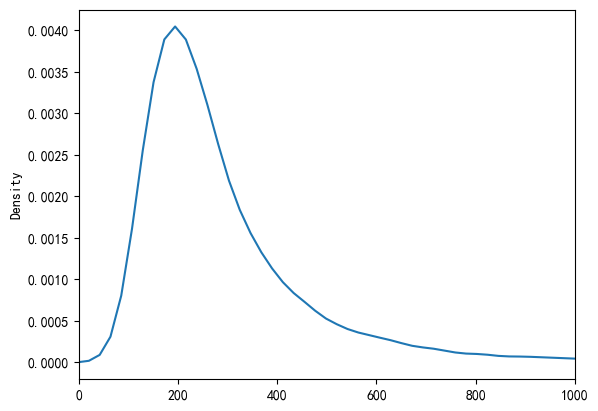

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

dl_patent['首权字数'].plot.kde(xlim=[0,1000])

<Axes: ylabel='Density'>

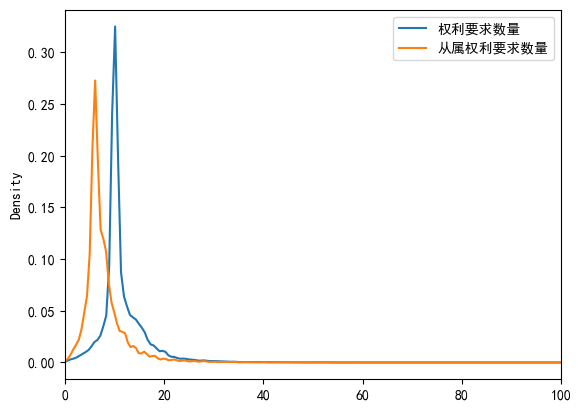

In [51]:
dl_patent[['权利要求数量', '从属权利要求数量']].plot.kde(xlim=[0,100])

独立权利要求数量,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,20.0,24.0,42.0
apply_date,,,,,,,,,,,,,,,,,,,,
2000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2002,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2003,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2007,33,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008,10,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2009,14,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010,27,18,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011,49,20,8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


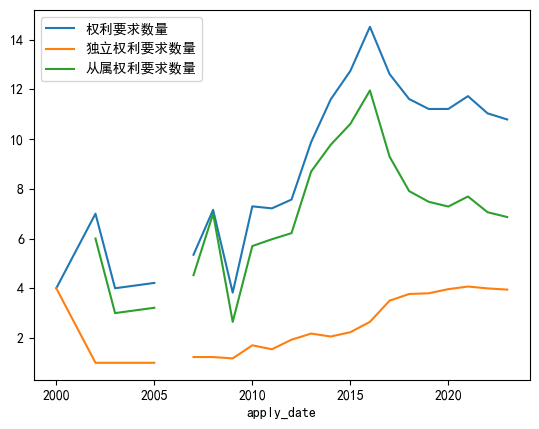

In [52]:
#10年后
dl_patent.groupby(dl_patent.apply_date.dt.year)[['权利要求数量','独立权利要求数量','从属权利要求数量']].mean().plot()
pd.crosstab(dl_patent.apply_date.dt.year,dl_patent.独立权利要求数量)

<Axes: xlabel='简单同族个数', ylabel='扩展同族个数'>

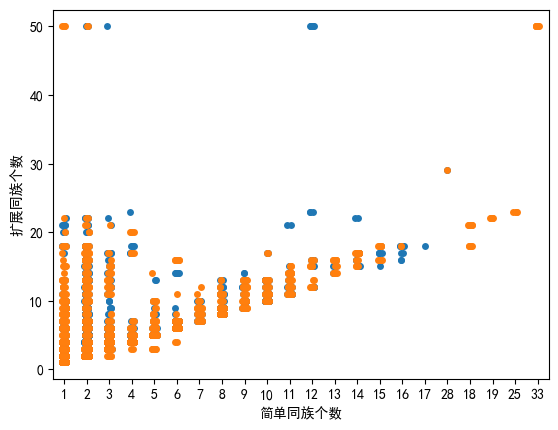

In [53]:
sns.stripplot(data=dl_patent,x='简单同族个数',y='扩展同族个数')#扩展同族个数>简单同族个数
sns.stripplot(data=dl_patent,x='DocDB同族个数',y='扩展同族个数')#扩展同族个数>DocDB同族个数

<Axes: xlabel='简单同族个数', ylabel='DocDB同族个数'>

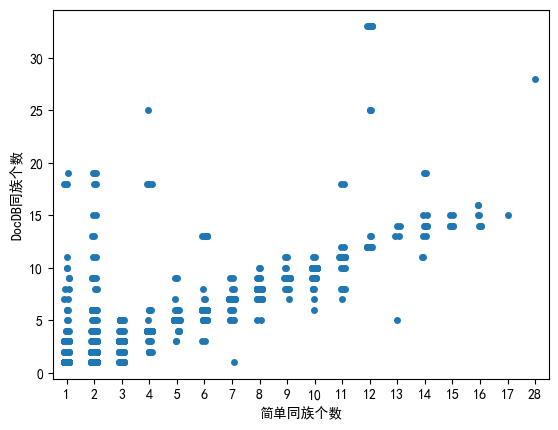

In [54]:
sns.stripplot(data=dl_patent,x='简单同族个数',y='DocDB同族个数')#'简单同族个数'~'DocDB同族个数'

In [1]:
#10年后区分开
dl_patent.groupby(dl_patent.apply_date.dt.year)[['简单同族个数','扩展同族个数','DocDB同族个数']].mean().plot(title='历年同族个数平均')

NameError: name 'dl_patent' is not defined

In [56]:
dl_invest_round.投资时间.max()

Timestamp('2023-09-30 00:00:00')

<Axes: title={'center': '历年各投资轮次数量'}, xlabel='投资时间'>

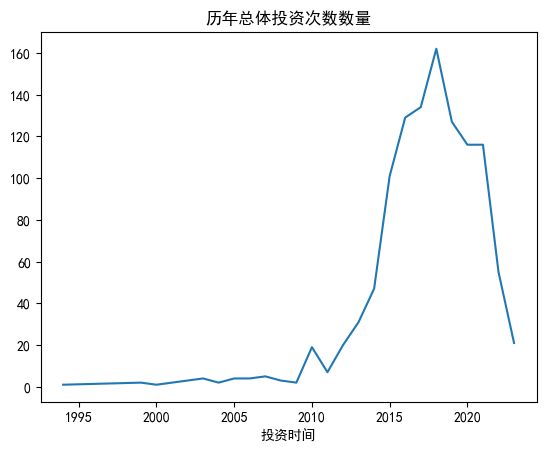

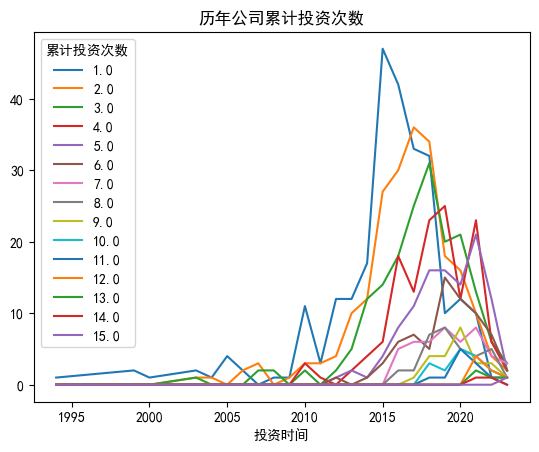

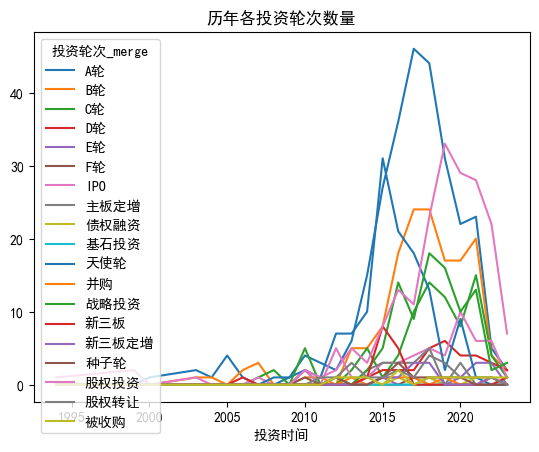

In [57]:
#投资数据同样10年后
#投资轮次合并,去掉附加信息
dl_invest_round['投资轮次_merge']=dl_invest_round['投资轮次名称'].str.replace('Pre-|Post-|-|1|2','',regex=True)
dl_invest_round['投资轮次_merge']=dl_invest_round['投资轮次_merge'].str.replace('+','').replace('++','')
dl_invest_1=dl_invest_round.query('投资时间<"2023-09-30"')
dl_invest_1.投资时间.dt.year.value_counts().sort_index().plot(title='历年总体投资次数数量')
pd.crosstab(dl_invest_1.投资时间.dt.year,dl_invest_1.累计投资次数).plot(title='历年公司累计投资次数')
pd.crosstab(dl_invest_1.投资时间.dt.year,dl_invest_1.投资轮次_merge).plot(title='历年各投资轮次数量')

In [58]:
#投资轮次合并后排序字典
s_投资轮次=dl_invest_round.投资轮次_merge.dropna().unique()
idx_投资轮次={label:idx for idx,label in enumerate(sorted(s_投资轮次),start=1)} #dict(zip(sorted(l_投资轮次),np.arange(len(l_投资轮次))))
dl_invest_round['投资轮次_id'] = dl_invest_round.投资轮次_merge.map(idx_投资轮次)

In [59]:
for col in ['申请人类型','公开类型', '专利类型','专利有效性','当前法律状态','文献种类代码']:#公开类型:专利类型,专利有效性:当前法律状态,文献种类代码
    print(dl_patent[col].value_counts())

申请人类型
企业                  41308
企业  大专院校              109
企业  科研单位               30
企业  机关团体               18
企业  科研单位  机关团体          2
企业  个人                  2
个人  企业                  1
Name: count, dtype: int64
公开类型
发明申请        30202
发明授权         8732
外观设计         2769
实用新型         1550
修正或者更正专利        2
Name: count, dtype: int64
专利类型
发明申请    30204
发明授权     8732
外观设计     2769
实用新型     1550
Name: count, dtype: int64
专利有效性
有效    21029
审中    18908
失效     3318
Name: count, dtype: int64
当前法律状态
授权      21029
实质审查    17876
驳回       2614
公开       1032
未缴年费      316
撤回        285
期限届满       84
放弃         10
避重放弃        9
Name: count, dtype: int64
文献种类代码
A     30202
B      8726
S      2714
U      1519
D        55
Y        31
C         6
A8        2
Name: count, dtype: int64


In [60]:
def process_row_state_total(row, filter_table,col,states):
    filter_value = process_filter_value(row,filter_table,col)
    if isinstance(states, (list,set,dict,tuple,pd.Series,pd.DataFrame,)):
        return filter_value.loc[filter_value[col].isin(states),'申请号'].nunique() #return filter_value[col].isin(states).sum()
    return filter_value.loc[filter_value[col] == states,'申请号'].nunique()

In [61]:
dl_invest_round['发明申请数量']=dl_invest_round.apply(process_row_state_total, args=(dl_patent,'专利类型','发明申请',), axis=1)
dl_invest_round['发明授权数量']=dl_invest_round.apply(process_row_state_total, args=(dl_patent,'专利类型','发明授权',), axis=1)
dl_invest_round['外观设计数量']=dl_invest_round.apply(process_row_state_total, args=(dl_patent,'专利类型','外观设计',), axis=1)
dl_invest_round['实用新型数量']=dl_invest_round.apply(process_row_state_total, args=(dl_patent,'专利类型','实用新型',), axis=1)
dl_invest_round['有效数量']=dl_invest_round.apply(process_row_state_total, args=(dl_patent,'专利有效性','有效',), axis=1)
dl_invest_round['审中数量']=dl_invest_round.apply(process_row_state_total, args=(dl_patent,'专利有效性','审中',), axis=1)
dl_invest_round['失效数量']=dl_invest_round.apply(process_row_state_total, args=(dl_patent,'专利有效性','失效',), axis=1)

In [62]:
dl_patent[['Conme','第一申请人', '当前权利人']]

,Conme,第一申请人,当前权利人
0,深圳前海微众银行股份有限公司,深圳前海微众银行股份有限公司,深圳前海微众银行股份有限公司
1,深圳前海微众银行股份有限公司,深圳前海微众银行股份有限公司,深圳前海微众银行股份有限公司
2,中国平安人寿保险股份有限公司,中国平安人寿保险股份有限公司,中国平安人寿保险股份有限公司
5,上海豹云网络信息服务有限公司,上海豹云网络信息服务有限公司,上海豹云网络信息服务有限公司
7,深圳前海微众银行股份有限公司,深圳前海微众银行股份有限公司,深圳前海微众银行股份有限公司
...,...,...,...
113073,云南南天电子信息产业股份有限公司,云南南天电子信息产业股份有限公司,云南南天电子信息产业股份有限公司
113075,云南南天电子信息产业股份有限公司,云南南天电子信息产业股份有限公司,云南南天电子信息产业股份有限公司
113086,云南南天电子信息产业股份有限公司,云南南天电子信息产业股份有限公司,云南南天电子信息产业股份有限公司
113087,云南南天电子信息产业股份有限公司,云南南天电子信息产业股份有限公司,云南南天电子信息产业股份有限公司


In [63]:
def process_row_patent_num(row, filter_table):
    filter_value = process_filter_value(row,filter_table,'当前权利人')
    return filter_value['当前权利人'].str.split(';', expand=True).stack().count()

dl_invest_round['权利人数量']=dl_invest_round.apply(process_row_patent_num, args=(dl_patent,), axis=1)
dl_invest_round['申请人数量']=dl_invest_round.apply(process_filter_value, args=(dl_patent,'申请人数量','sum'), axis=1)

In [64]:
(dl_invest_round['权利人数量']!=dl_invest_round['申请人数量']).sum()

88

In [65]:
dl_patent.query('第一申请人=="北京市商汤科技开发有限公司"')[['IPC','CPC','国民经济分类', '新兴产业分类','工商企业状态']].dropna()

,IPC,CPC,国民经济分类,新兴产业分类,工商企业状态
2307,G06T7/00; G06T7/60; G06V10/46; G06V10/74; G06V...,G06T7/0008; G06T7/60; G06T2207/10004; G06T2207...,I6579; I6532; I6571; I6572,9.1 (新技术与创新创业服务),存续(在营、开业、在册)
2742,G06T19/00; G06F30/13,G06T19/006; G06F30/13; G06T2210/04,I6490; C4390; I6440; C3961; I6439; I6579; O812...,"1.3 (新兴软件和新型信息技术服务),8.2 (数字文化创意活动)",存续(在营、开业、在册)
2748,G06T3/00; G06T3/40; G06V20/70; G06V10/26; G06V...,G06T7/11; G06T5/002; G06T2207/20081; G06T2207/...,I6579; I6532; I6571; I6572,8.2 (数字文化创意活动),存续(在营、开业、在册)
2951,G06T7/33; G06V40/16; G06V10/44; G06F3/0488; G0...,G06T7/33; G06F3/0488; G06T7/80; G06F9/451; G06...,I6490; C3912; C3913; C4390; I6440; C3961; I651...,"1.1 (下一代信息网络产业),1.3 (新兴软件和新型信息技术服务),9.1 (新技术与创...",存续(在营、开业、在册)
2964,G06T7/00; G06T7/70; G06V10/80; G06V10/82; G06N...,G06T7/0002; G06T7/70; G06N3/084; G06N3/045; G0...,I6490; C3914; C3915; C3919; I6440; I6439; I657...,"1.4 (互联网与云计算、大数据服务),9.1 (新技术与创新创业服务)",存续(在营、开业、在册)
...,...,...,...,...,...
104222,G06F17/30,G06F16/36; G06F16/54; G06F16/583; G06F16/9024;...,I6490; I6429; C4390; I6421; I6422; I6440; C396...,1.4 (互联网与云计算、大数据服务),存续(在营、开业、在册)
104223,G06K9/00; G06V10/44; G06V10/56,G06V40/171; G06V40/172; G06V10/44; G06V10/454;...,I6490; C3973; C3479; I6440; C2330; I6439; I643...,1.5 (人工智能),存续(在营、开业、在册)
104457,G06K9/00; G06V10/426; G06V10/764,G06V40/171; G06V10/426; G06V10/764; G06F18/241...,I6490; C3973; C3479; I6440; C2330; I6439; I643...,1.5 (人工智能),存续(在营、开业、在册)
105403,G06K9/00,G06V40/171; G06V40/161; G06V40/45; G06K9/00228...,I6490; C3973; C3479; I6440; C2330; I6439; I643...,1.5 (人工智能),存续(在营、开业、在册)


In [66]:
dl_patent['国民经济分类'].str.split(';',expand=True).stack().nunique()

702

In [67]:
dl_patent['IPC'].str.split(';',expand=True).stack().str.extract('(.*)/')[0].nunique()

1335

In [68]:
dl_patent['CPC'].str.split(';',expand=True).stack().str.extract('(.*)/')[0].nunique()

1088

In [69]:
np.sort(dl_patent.新兴产业分类.str.split(',',expand=True).stack().str.extract('(\d+\.?\d*)')[0].unique())

array(['1.1', '1.2', '1.3', '1.4', '1.5', '2.1', '2.2', '2.3', '2.4',
       '3.2', '3.3', '3.4', '3.6', '3.7', '4.1', '4.2', '4.3', '4.5',
       '5.1', '5.2', '5.3', '5.4', '6.1', '6.2', '6.3', '6.4', '6.5',
       '7.1', '7.2', '7.3', '8.1', '8.2', '8.4', '9.1', '9.2'],
      dtype=object)

In [70]:
dl_invest_round.apply(process_filter_last_value, args=(dl_patent,'工商企业状态'), axis=1).unique()

array([None, '在营(开业)企业', '存续(在营、开业、在册)', '存续',
       '存续(在营、开业、在册); 存续(在营、开业、在册)',
       '存续(在营、开业、在册); 存续(在营、开业、在册); 存续(在营、开业、在册)', '存续; 存续(在营、开业、在册)',
       '存续; 存续', '存续(在营、开业、在册); 开业', '在业', '在业; 存续(在营、开业、在册)',
       '存续(在营、开业、在册); 正常', '开业', '存续(在营、开业、在册); 在营(开业)企业; 存续(在营、开业、在册)',
       '存续(在营、开业、在册); 存续', '注销', '存续(在营、开业、在册); 注销'], dtype=object)

In [71]:
def process_row_last_state(row, filter_table):
    value = process_filter_last_value(row,filter_table,'工商企业状态')
    if value:
        return value.split(';')[-1].strip()
    #.str.split(';',expand=True).fillna(method='ffill',axis=1).mode().iloc[0,-1]
        
dl_invest_round['工商企业状态']=dl_invest_round.apply(process_row_last_state, args=(dl_patent,), axis=1)
dl_invest_round['工商企业状态'].value_counts()

工商企业状态
存续(在营、开业、在册)    585
存续               57
在营(开业)企业         29
开业                7
在业                7
正常                3
注销                2
Name: count, dtype: int64

In [72]:
amount_ext=dl_invest_round.转换后投资金额.str.extract('(\d*?\.?\d*)([\u4e00-\u9fa5]+)')#'(未披露?|数?)(.*)'
amount_ext[1].value_counts()

1
未披露      481
亿元       216
万元       120
万美元       84
数千万元      78
亿美元       47
数百万元      26
数亿元       26
数千万美元     19
数百万美元     12
亿港元        2
数亿美元       1
数十亿元       1
Name: count, dtype: int64

In [73]:
#连接交易集成模块
import MetaTrader5 as mt5
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()
mt5.symbol_select("USDCNH",True)
mt5.symbol_select("USDHKD",True)

True

In [74]:
#获得每日价格
df_usdcnh=pd.DataFrame(mt5.copy_rates_range("USDCNH", mt5.TIMEFRAME_D1, dl_invest_round.投资时间.min(), dl_invest_round.投资时间.max()))#USDCNY
s_usdcnh=pd.Series(df_usdcnh.close.values,index=pd.to_datetime(df_usdcnh.time, unit='s'))
df_usdhkd=pd.DataFrame(mt5.copy_rates_range("USDHKD", mt5.TIMEFRAME_D1, dl_invest_round.投资时间.min(), dl_invest_round.投资时间.max()))
s_usdhkd=pd.Series(df_usdhkd.close.values,index=pd.to_datetime(df_usdhkd.time, unit='s'))
s_hkdcnh=(s_usdhkd/s_usdcnh).dropna()#pd.concat(objs=[s_usdhkd,s_usdcnh],axis=1,join='inner')
s_hkdcnh

time
2015-11-17    1.209230
2015-11-18    1.207824
2015-11-19    1.210562
2015-11-20    1.207250
2015-11-23    1.205929
                ...   
2023-09-25    1.068590
2023-09-26    1.070042
2023-09-27    1.068092
2023-09-28    1.073511
2023-09-29    1.073657
Length: 2040, dtype: float64

In [75]:
mt5.shutdown()
#投资时间在周末,无汇率数据
#dl_invest_round[(dl_invest_round.投资时间>=s_hkdcnh.index.min())&(~dl_invest_round.投资时间.isin(s_hkdcnh.index))].投资时间.sort_values()
#周末汇率前项填充
s_hkdcnh=pd.Series(s_hkdcnh,index=pd.date_range(start=s_hkdcnh.index.min(), end=s_hkdcnh.index.max()+np.timedelta64(1,'D'), freq="D")).fillna(method='ffill')
s_usdcnh=pd.Series(s_usdcnh,index=pd.date_range(start=s_usdcnh.index.min(), end=s_usdcnh.index.max()+np.timedelta64(1,'D'), freq="D")).fillna(method='ffill')

In [76]:
# s_usdcnh.reset_index().rename(columns={'index':'time',0:'close'}).to_sql('USDCNH202309',con=engine,chunksize=10000,if_exists='replace',index=False)
# s_hkdcnh.reset_index().rename(columns={'index':'time',0:'close'}).to_sql('HKDCNH202309',con=engine,chunksize=10000,if_exists='replace',index=False)

In [77]:
#早于汇率表数据用汇率均值
amount_ext['投资金额']=amount_ext[0].map(lambda x:np.nan if x=="" else float(x)) #astype(float)
for row in amount_ext.itertuples():
    if not pd.isna(row[2]):
        rate=1.0
        time=dl_invest_round.loc[row.Index,'投资时间']
        if row[2].find('美元')!=-1:
            rate=s_usdcnh[time] if time>=s_usdcnh.index.min() else s_usdcnh.mean()
        elif row[2].find('港元')!=-1:
            rate=s_hkdcnh[time] if time>=s_hkdcnh.index.min() else s_hkdcnh.mean()

        if row[2].find('十')!=-1:
            rate*=10
        elif row[2].find('百')!=-1:
            rate*=100
        elif row[2].find('千')!=-1:
            rate*=1000

        if row[2].find('亿')!=-1:
            rate*=10000
        elif row[2].find('万')!=-1:
            pass

        if row[2].find('数')!=-1 and pd.isna(row.投资金额):
            amount_ext.loc[row.Index,'投资金额']=5*rate #mean
            pass
        else:
            amount_ext.loc[row.Index,'投资金额']*=rate
        #print(row,row.Index,row[1],row[2],rate,time)

amount_ext.dropna()

,0,1,投资金额
2,,数千万元,5000.0
9,2.36,亿元,23600.0
10,2.34,亿元,23400.0
13,2,亿元,20000.0
16,6000,万元,6000.0
...,...,...,...
1908,1,亿元,10000.0
1913,1.01,亿元,10100.0
1914,11.5,亿美元,725477.5
1917,1000,万元,1000.0


In [78]:
(amount_ext.loc[amount_ext[0]!='','投资金额'].median(),
amount_ext.loc[amount_ext[0]!='','投资金额'].mean(),
amount_ext.loc[amount_ext[1].str.find('数')==0,'投资金额'].mean(),
amount_ext.投资金额.mean())

(15000.0, 53659.740424485164, 19798.736922710053, 44926.60186310962)

In [79]:
#新增投资金额数据
dl_invest_round['投资金额']=amount_ext.投资金额
dl_invest_round.groupby('投资轮次名称').投资金额.mean()#_merge

投资轮次名称
A++轮          3000.000000
A+轮           8949.161429
A1轮           1478.423000
A2轮           5082.896000
A轮           16013.633876
B+轮          30178.583334
B1轮          82544.400000
B2轮         103566.650000
B轮           28823.247196
C+轮          88626.073444
C1轮          15000.000000
C2轮          22800.000000
C轮           52920.963925
D++轮         65286.800000
D+轮          31638.155000
D-2轮                  NaN
D1轮                   NaN
D2轮          50000.000000
D轮          123920.956250
E+轮          30000.000000
E1轮          63787.400000
E2轮          71691.100000
E轮           67966.786667
F轮          150000.000000
IPO          90032.423684
Post-IPO    266172.637500
Pre-A轮        4476.946628
Pre-B轮       10000.000000
Pre-C轮       23500.000000
Pre-IPO     144864.268000
主板定增         53076.923077
债权融资        126493.376250
基石投资         72890.400000
天使+轮          5000.000000
天使轮           1707.161803
并购           29178.500000
战略投资        152351.280513
新三板                   NaN
新三板定增

In [80]:
#投资金额未披露用对应轮次投资金额均值
amount_ext1=dl_invest_round.groupby('投资轮次名称').投资金额.mean()
mask=(dl_invest_round.转换后投资金额=='未披露')
dl_invest_round.loc[mask,'投资金额']=amount_ext1[dl_invest_round.loc[mask,'投资轮次名称']].values
mask.sum()

481

In [81]:
#空值继续用投资轮次_merge
amount_ext2=dl_invest_round.groupby('投资轮次_merge').投资金额.mean()
mask=(dl_invest_round.转换后投资金额=='未披露') & pd.isna(dl_invest_round['投资金额'])
dl_invest_round.loc[mask,'投资金额']=amount_ext2[dl_invest_round.loc[mask,'投资轮次_merge']].values
mask.sum()

18

In [82]:
#未披露:轮次投资金额均值空用对应公司投资金额均值
amount_ext3=dl_invest_round.groupby('公司全称').投资金额.mean().fillna(dl_invest_round.投资金额.mean())
mask=(dl_invest_round.转换后投资金额=='未披露') & pd.isna(dl_invest_round['投资金额'])
dl_invest_round.loc[mask,'投资金额']=amount_ext3[dl_invest_round.loc[mask,'公司全称']].values
mask.sum()

16

In [83]:
dl_invest_round[['转换后投资金额','投资金额']].count()

转换后投资金额    1113
投资金额       1113
dtype: int64

<Axes: title={'center': '各轮次投资方数量及投资次数'}, xlabel='投资轮次_merge'>

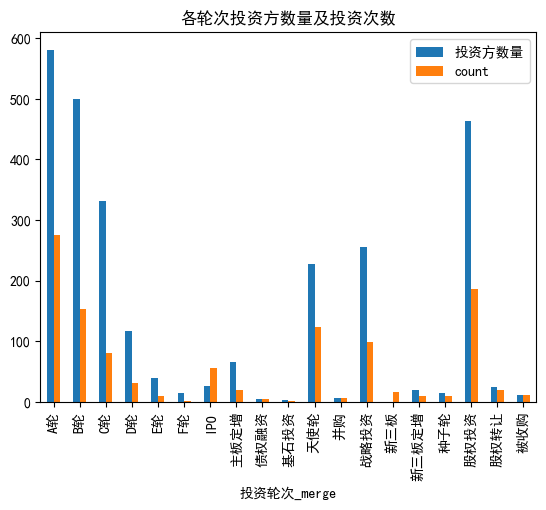

In [84]:
pd.concat([dl_invest_round.groupby(by='投资轮次_merge').投资方数量.sum(),
           dl_invest_round['投资轮次_merge'].value_counts(sort=False)],axis=1).plot.bar(title='各轮次投资方数量及投资次数')

<Axes: title={'center': '每轮次平均投资金额及各投资方平均（万元）'}, xlabel='投资轮次_merge'>

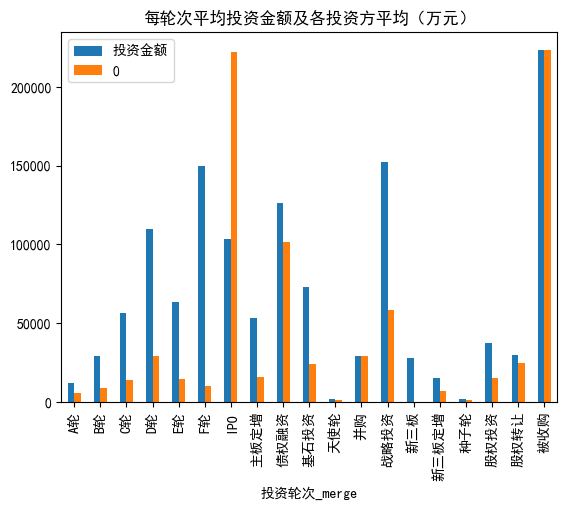

In [85]:
#IPO投资方空较多，假设投资方均等出资
pd.concat([dl_invest_round.groupby('投资轮次_merge').投资金额.mean(),
           dl_invest_round.groupby('投资轮次_merge').投资金额.sum()/dl_invest_round.groupby(by='投资轮次_merge').投资方数量.sum()],
        axis=1).plot.bar(title='每轮次平均投资金额及各投资方平均（万元）')

In [86]:
dl_invest_round.query('投资轮次_merge =="IPO"').filter(like="资")

,最新融资时间,最新融资轮次,最新融资金额,投资方,投资时间,投资轮次名称,转换后投资金额,投资方.1,累计投资时间,累计投资次数,投资方.2,投资方数量,累计投资方数量,投资轮次_merge,投资轮次_id,投资金额
9,2018-01-05,主板定增,2.34亿元,汇添富、上海重岳投资管理、泰康保险、博时基金、财通基金管理有限公司,2003-12-24,IPO,2.36亿元,NaN,1184.0,3.0,NaN,0,NaN,IPO,7.0,23600.000000
16,NaT,NaN,NaN,NaN,1994-04-08,IPO,6000万元,NaN,0.0,1.0,NaN,0,NaN,IPO,7.0,6000.000000
29,NaT,NaN,NaN,NaN,2018-11-07,IPO,3.34亿元,NaN,1772.0,4.0,NaN,0,NaN,IPO,7.0,33400.000000
48,NaT,NaN,NaN,NaN,2021-03-18,Pre-IPO,5.07亿美元,Cederberg Capital，国调基金，Franchise Fund LP,2274.0,7.0,Cederberg Capital;国调基金;Franchise Fund LP,3,22.0,IPO,7.0,329864.340000
49,NaT,NaN,NaN,NaN,2021-03-31,IPO,未披露,NaN,2287.0,8.0,NaN,0,NaN,IPO,7.0,90032.423684
67,2021-04-09,IPO,未披露,NaN,2021-04-09,IPO,未披露,NaN,1740.0,5.0,NaN,0,NaN,IPO,7.0,90032.423684
127,NaT,NaN,NaN,NaN,2020-12-31,Pre-IPO,未披露,NaN,2246.0,11.0,NaN,0,NaN,IPO,7.0,144864.268000
129,NaT,NaN,NaN,NaN,2021-12-30,IPO,55.52亿港元,NaN,2610.0,13.0,NaN,0,NaN,IPO,7.0,679151.360584
139,NaT,NaN,NaN,NaN,2012-07-18,IPO,3.91亿元,NaN,870.0,2.0,NaN,0,NaN,IPO,7.0,39100.000000
227,NaT,NaN,NaN,NaN,2020-05-08,IPO,未披露,NaN,2745.0,11.0,NaN,0,NaN,IPO,7.0,90032.423684


In [87]:
dl_invest_round.query('投资轮次_merge in ["债权融资","被收购"]').filter(like="资")

,最新融资时间,最新融资轮次,最新融资金额,投资方,投资时间,投资轮次名称,转换后投资金额,投资方.1,累计投资时间,累计投资次数,投资方.2,投资方数量,累计投资方数量,投资轮次_merge,投资轮次_id,投资金额
415,NaT,NaN,NaN,NaN,2021-02-09,债权融资,6500万美元,小米科技领投,2391.0,10.0,小米科技,1,30.0,债权融资,9.0,41720.575000
473,2018-05-24,A轮,未披露,澎湃资本，双湖资本,2012-11-01,被收购,数百万美元,百度,305.0,2.0,百度,1,3.0,被收购,19.0,3371.660337
500,NaT,NaN,NaN,NaN,2013-10-17,被收购,6.25亿美元,黑石集团等,3303.0,5.0,黑石集团,1,11.0,被收购,19.0,421457.542174
501,2019-12-20,被收购,7.5亿美元,中国电子,2016-10-05,被收购,6.75亿美元,海航资本,4387.0,6.0,海航资本,1,12.0,被收购,19.0,452094.750000
502,NaT,NaN,NaN,NaN,2018-11-26,债权融资,8000万美元,Davidson Kempner Capital Management,5169.0,7.0,Davidson Kempner Capital Management,1,13.0,债权融资,9.0,55596.000000
503,NaT,NaN,NaN,NaN,2019-12-20,被收购,7.5亿美元,中国电子,5558.0,8.0,中国电子,1,14.0,被收购,19.0,525048.750000
590,NaT,NaN,NaN,NaN,2021-08-27,被收购,未披露,金融壹账通,2212.0,7.0,金融壹账通,1,21.0,被收购,19.0,223509.462814
1067,NaT,NaN,NaN,NaN,2016-09-06,债权融资,2500万美元,ING Bank,609.0,3.0,ING Bank,1,7.0,债权融资,9.0,16684.250000
1196,2020-06-29,被收购,4.05亿元,扬子新材,2020-06-29,被收购,4.05亿元,扬子新材,1938.0,6.0,扬子新材,1,8.0,被收购,19.0,40500.000000
1323,NaT,NaN,NaN,NaN,2022-02-22,债权融资,6.2亿美元,红杉中国，ST Telemedia Global Data Centres等,6992.0,12.0,红杉中国;ST Telemedia Global Data Centres,2,16.0,债权融资,9.0,391972.680000


<Axes: title={'center': '历年平均投资金额及公司累加平均'}, xlabel='投资时间'>

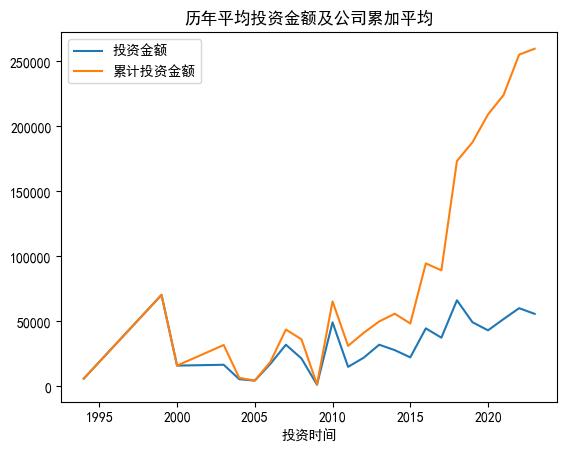

In [88]:
dl_invest_round['累计投资金额'] = dl_invest_round.groupby('公司全称')['投资金额'].transform(lambda x: x.cumsum())
dl_invest_round.groupby(by=dl_invest_round.投资时间.dt.year).agg({'投资金额':'mean','累计投资金额':'mean'}).plot(title='历年平均投资金额及公司累加平均')

In [89]:
#删除找不到专利和融资的公司:61
dl_invest_nan_1=dl_invest_round.query('投资时间=="2023-09-30" and 专利申请数量==0 and 累计投资次数==1')
mask_nan_abo=dl_invest_round['公司全称'].isin(dl_invest_nan_1['公司全称'])
mask_nan_abo.sum()

61

In [90]:
dl_invest_round=dl_invest_round[~mask_nan_abo]
dl_invest_round.to_excel('data\\内地金融科技企业_ALL.xlsx')#[dl_invest_round.nunique().sort_values(ascending=False).index]
dl_invest_round.shape

(1859, 81)

In [91]:
#投资前有专利数据的公司,过滤投资时无专利数据的:705
ABO = dl_invest_round.query('投资时间<"2023-09-30"').groupby('公司全称').filter(lambda x: x['专利申请数量'].sum()>0)#.query('投资轮次_id>0')
ABO.to_excel('data\\内地金融科技企业专利_融资.xlsx')
#没专利有融资
AO = dl_invest_round.groupby('公司全称').filter(lambda x: x['专利申请数量'].max()==0)
#没融资有专利
BO = dl_invest_round.groupby('公司全称').filter(lambda x: x['投资轮次名称'].count()==0) 
#有专利数据,投资前没匹配到
other = set(dl_invest_round.公司全称)-(set(ABO.公司全称)|set(AO.公司全称)|set(BO.公司全称))
other#set(dl_invest['公司全称'])-set(ABO.公司全称)

{'上海即科智能技术集团有限公司',
 '上海安硕信息技术股份有限公司',
 '上海屹通信息科技发展有限公司',
 '上海欧冶金诚信息服务股份有限公司',
 '中银消费金融有限公司',
 '亚信安全科技股份有限公司',
 '北京中数智汇科技股份有限公司',
 '北京优品三悦科技发展有限公司',
 '北京宏瓴科技发展有限公司',
 '北京感易智能科技有限公司',
 '北京本应科技有限公司',
 '北京车与车科技有限公司',
 '北京道口金科科技有限公司',
 '北京金信网银金融信息服务有限公司',
 '北京阿尔山金融科技有限公司',
 '北京领雁科技股份有限公司',
 '南京三百云信息科技有限公司',
 '四川新网银行股份有限公司',
 '天津金城银行股份有限公司',
 '天道金科股份有限公司',
 '广州运通链达金服科技有限公司',
 '开鑫科技有限公司',
 '徽商银行股份有限公司',
 '心有灵犀科技股份有限公司',
 '杭州融都科技股份有限公司',
 '杭州衡泰技术股份有限公司',
 '浙江网商银行股份有限公司',
 '深圳四方精创资讯股份有限公司',
 '深圳大数信科技术有限公司',
 '深圳大道云科技有限公司',
 '深圳市今日投资数据科技有限公司',
 '深圳市时代华盛网络科技有限公司',
 '深圳萨摩耶数字科技有限公司',
 '百行征信有限公司',
 '神州网信技术有限公司'}

In [92]:
ABA=dl_invest_round[dl_invest_round.公司全称.isin(other)]
(dl_invest_nan_1.公司全称.nunique(),
dl_invest_round.公司全称.nunique(),
ABO.公司全称.nunique(),
AO.公司全称.nunique(),
BO.公司全称.nunique(),
ABA.公司全称.nunique())

(49, 306, 142, 81, 48, 35)

In [93]:
def GM11(x0): #自定义灰色预测函数
  import numpy as np
  x1 = x0.cumsum() #1-AGO序列
  z1 = (x1[:len(x1)-1] + x1[1:])/2.0 #紧邻均值（MEAN）生成序列
  z1 = z1.reshape((len(z1),1))
  B = np.append(-z1, np.ones_like(z1), axis = 1)
  Yn = x0[1:].reshape((len(x0)-1, 1))
  [[a],[b]] = np.dot(np.dot(np.linalg.inv(np.dot(B.T, B)), B.T), Yn) #计算参数
  f = lambda k: (x0[0]-b/a)*np.exp(-a*(k-1))-(x0[0]-b/a)*np.exp(-a*(k-2)) #还原值
  delta = np.abs(x0 - np.array([f(i) for i in range(1,len(x0)+1)]))
  C = delta.std()/x0.std()
  P = 1.0*(np.abs(delta - delta.mean()) < 0.6745*x0.std()).sum()/len(x0)
  return f, a, b, x0[0], C, P #返回灰色预测函数、a、b、首项、方差比、小残差概率

In [94]:
#有不等时距问题
dl_invest_copy=dl_invest_round.copy()
total=0
for name,index in dl_invest_copy.groupby('公司全称').groups.items():
    #print(name,dl_invest_copy.loc[index])
    df=dl_invest_copy.loc[index].select_dtypes(exclude=['object','datetime'])
    for col in df.columns:
        now=df.loc[index[-1],col]
        s=df.loc[index[:-1],col].fillna(0)
        if s.all() and s.shape[0]>2:
            last=df.loc[index[:-1],col].fillna(method='ffill').iloc[-1]
            f=GM11(s.values)[0]
            v=f(s.shape[0]+1) #len(df)
            #print(name,col,v,last,now,s.shape,df.shape)
            if pd.isna(now) or not now:
                new=v if v>0 else last
                if new:
                    dl_invest_copy.loc[index[-1],col]=new
                    total+=1
                    print(name,col,new)
print(total)

万国数据服务有限公司 投资轮次_id 10.708263676207338
万国数据服务有限公司 投资金额 470843.107586497
万国数据服务有限公司 累计投资金额 2621978.8467580704
上海云扩信息科技有限公司 投资方数量 2.0
上海云扩信息科技有限公司 累计投资方数量 12.206886203826308
上海云扩信息科技有限公司 投资轮次_id 2.792533423753751
上海云扩信息科技有限公司 投资金额 57681.644111089394
上海云扩信息科技有限公司 累计投资金额 119838.08554454414
上海依图网络科技有限公司 投资方数量 2.7928149521540035
上海依图网络科技有限公司 累计投资方数量 32.58131283741798
上海依图网络科技有限公司 投资轮次_id 32.10187184419809
上海依图网络科技有限公司 投资金额 51023.98449586425
上海依图网络科技有限公司 累计投资金额 650006.7727514748
上海冰鉴信息科技有限公司 投资方数量 2.490511995088667
上海冰鉴信息科技有限公司 累计投资方数量 30.225640999337372
上海冰鉴信息科技有限公司 投资轮次_id 17.0
上海冰鉴信息科技有限公司 投资金额 45873.11772135412
上海冰鉴信息科技有限公司 累计投资金额 256933.62627619389
上海卡方信息科技有限公司 投资方数量 2.091232486556464
上海卡方信息科技有限公司 累计投资方数量 20.99026683992409
上海卡方信息科技有限公司 投资轮次_id 38.32088313079706
上海卡方信息科技有限公司 投资金额 73690.7165231288
上海卡方信息科技有限公司 累计投资金额 290365.1693666857
上海即科智能技术集团有限公司 累计投资次数 4.378303976976325
上海富数科技有限公司 投资轮次_id 11.606851538229932
上海富数科技有限公司 投资金额 85345.50471383709
上海富数科技有限公司 累计投资金额 268365.3042788777
上海收钱吧互联网科技

In [95]:
AB=dl_invest_copy.query('投资时间=="2023-09-30"')
AB.to_excel('data\\内地金融科技企业灰色预测.xlsx')
AB.shape

(230, 81)

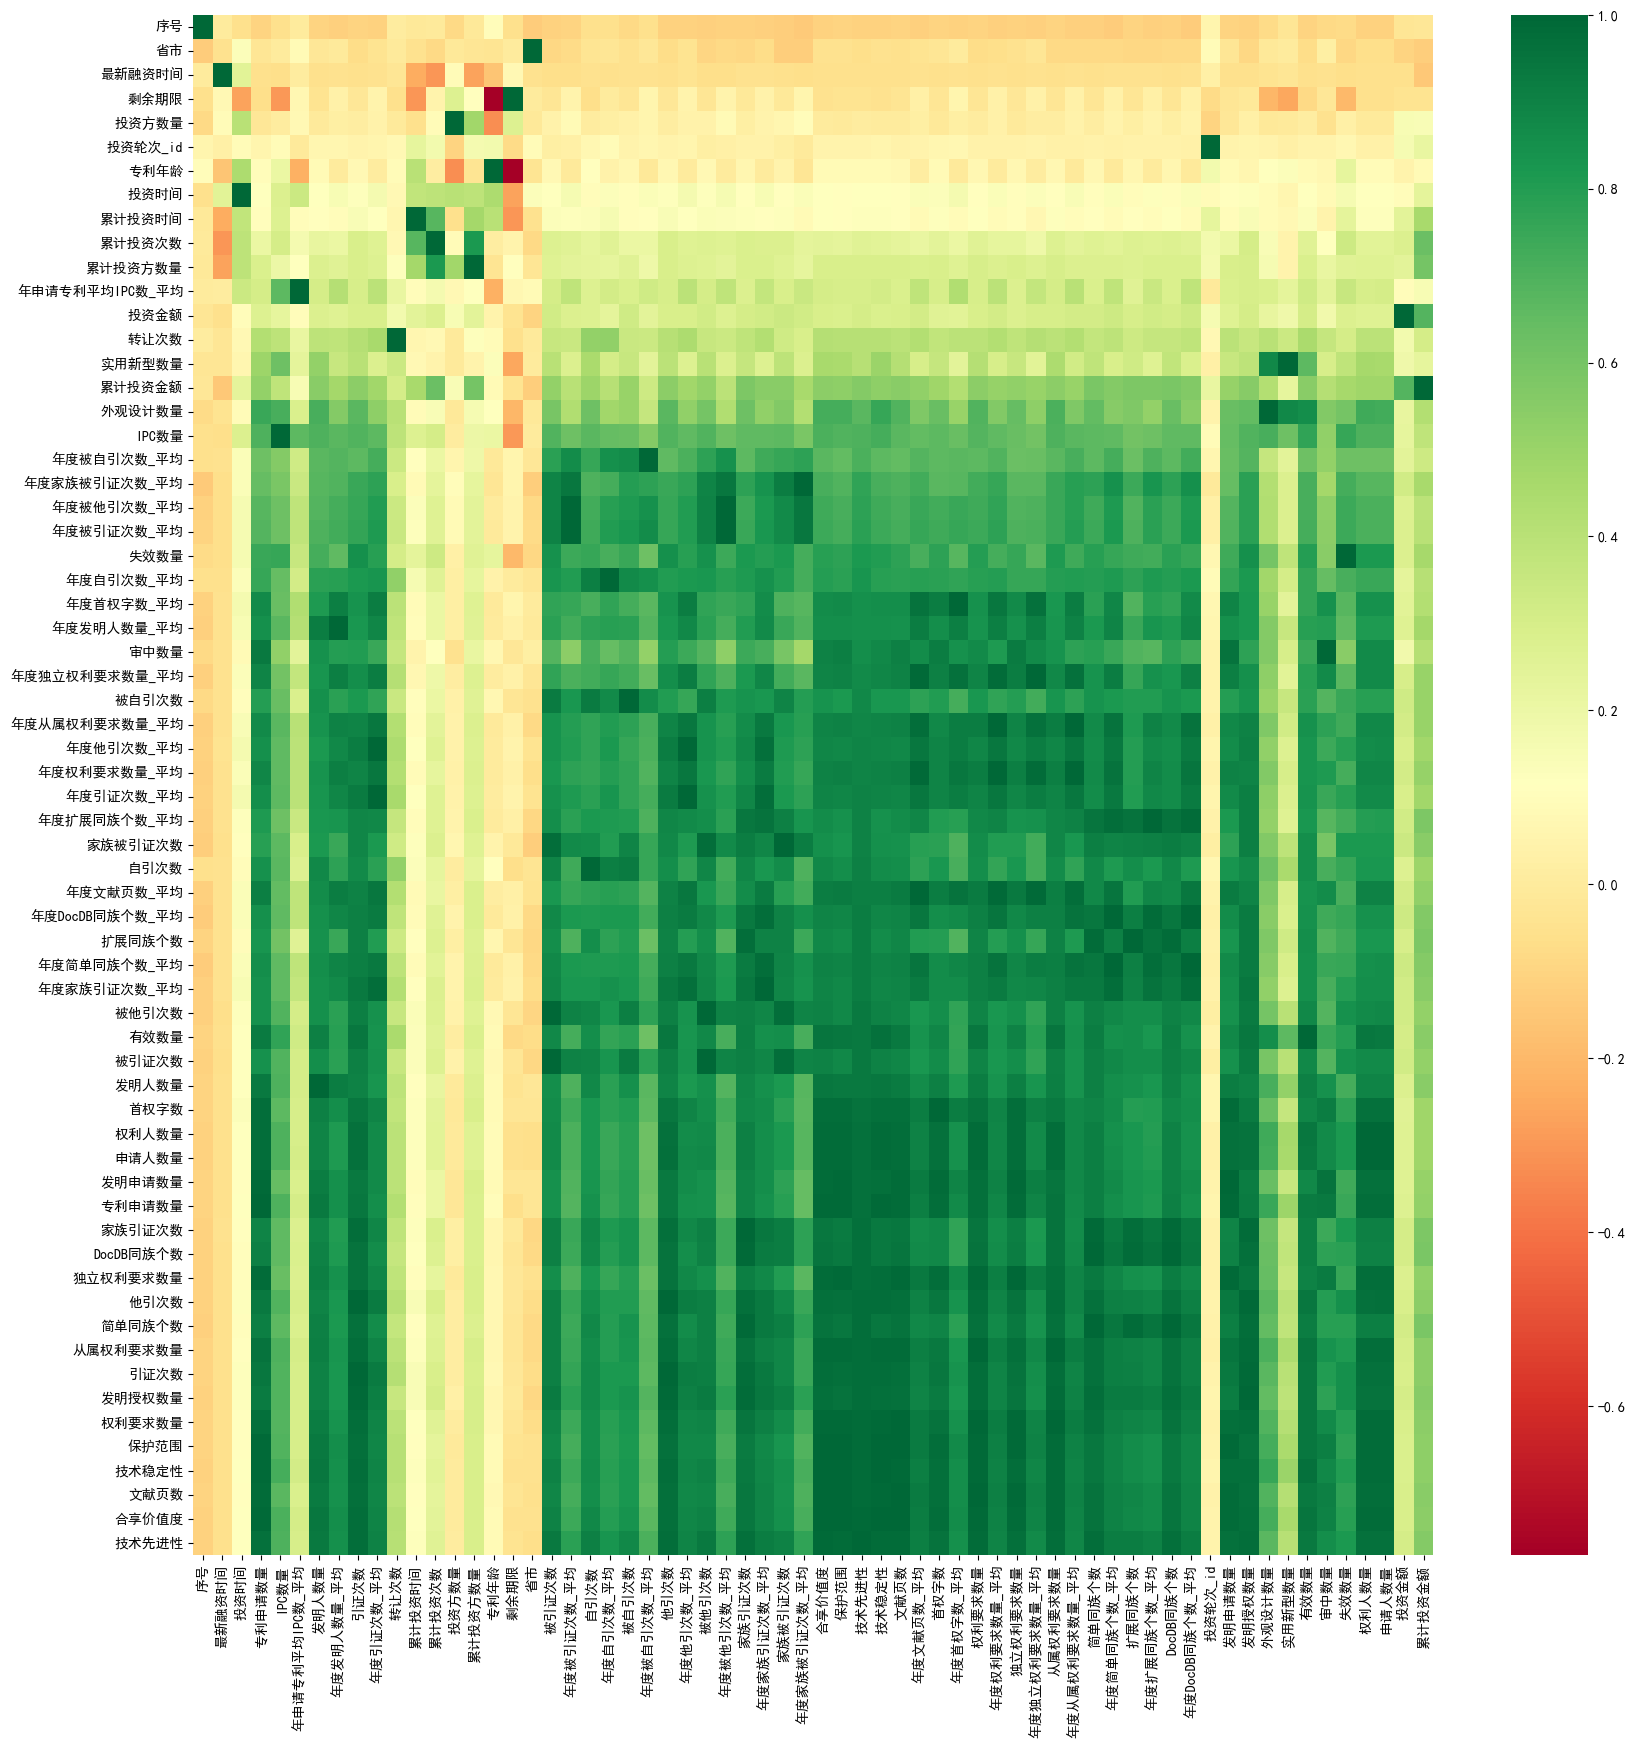

In [96]:
corr=dl_invest_round.select_dtypes(exclude='object').corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr.sort_values('技术先进性'),cmap='RdYlGn')
plt.savefig('data\\技术先进性相关热力图.png')

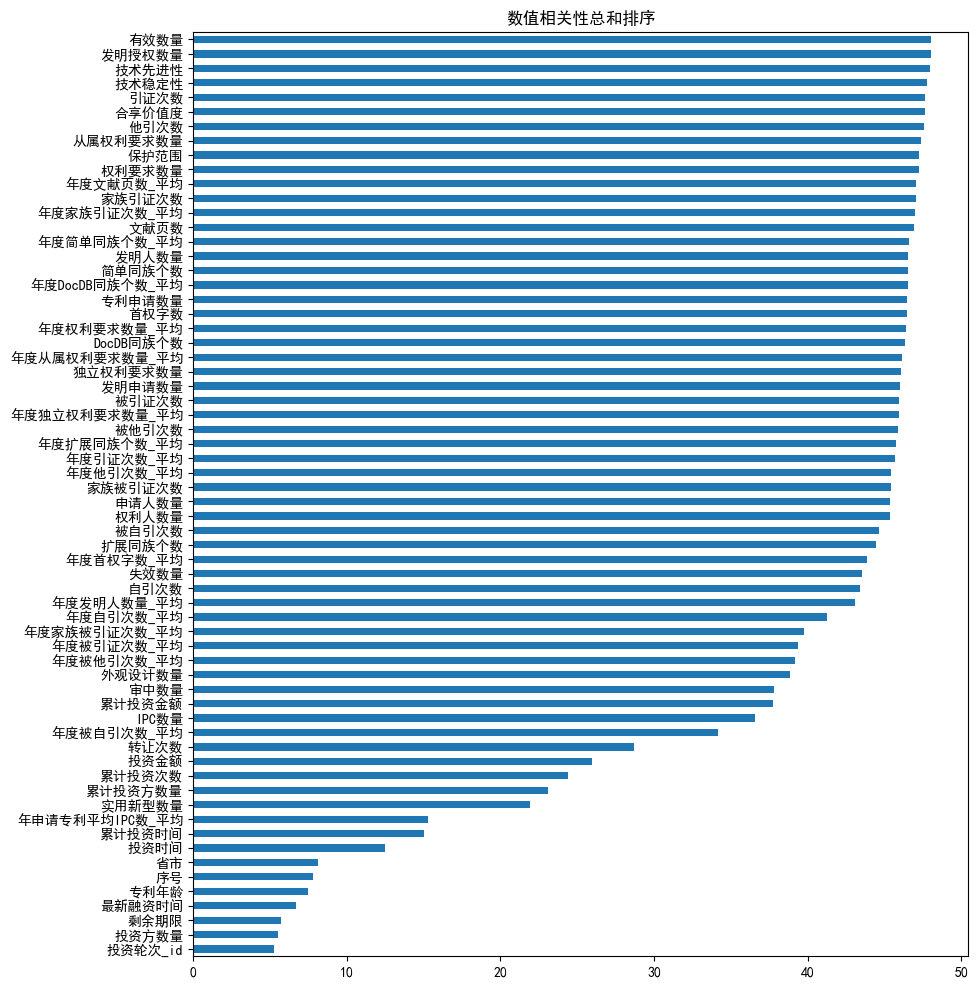

In [97]:
corr=ABO.select_dtypes(exclude='object').corr()
np.abs(corr).sum().sort_values().plot.barh(figsize=(10,12),title='数值相关性总和排序')
plt.savefig('data\\数值相关性总和排序.png')

<Axes: title={'center': '投资轮次相关性排序'}>

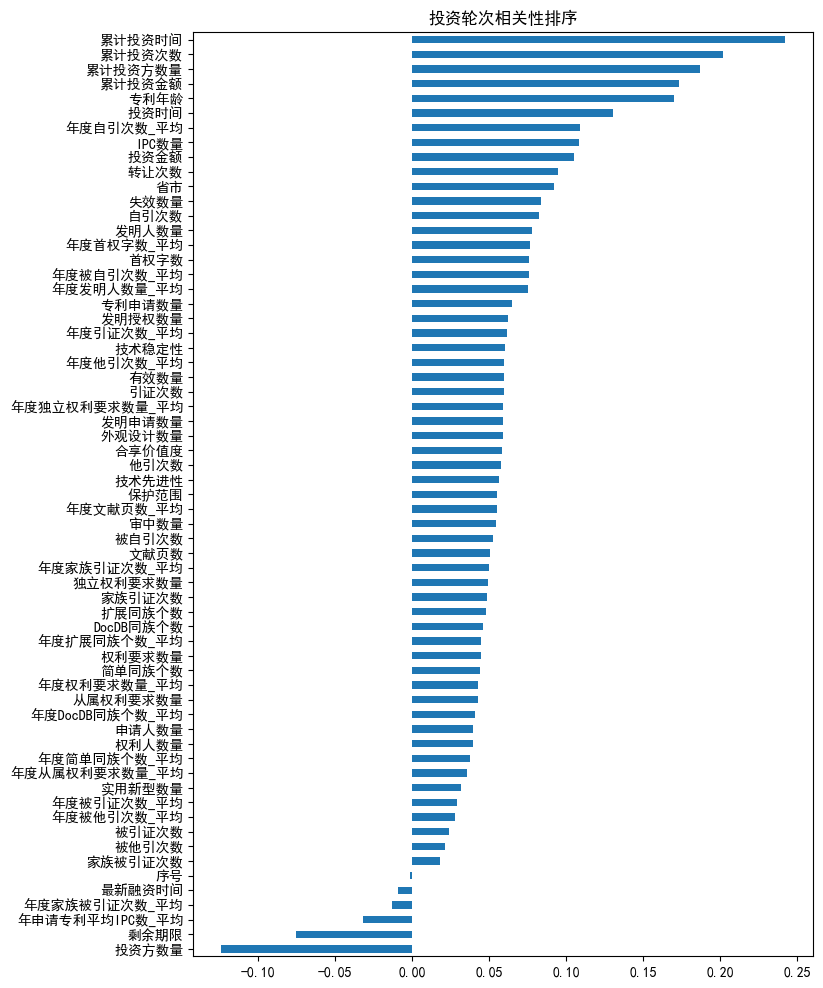

In [98]:
corr['投资轮次_id'].sort_values()[:-1].plot.barh(figsize=(8,12),title='投资轮次相关性排序')

<Axes: xlabel='投资轮次_merge', ylabel='专利年龄'>

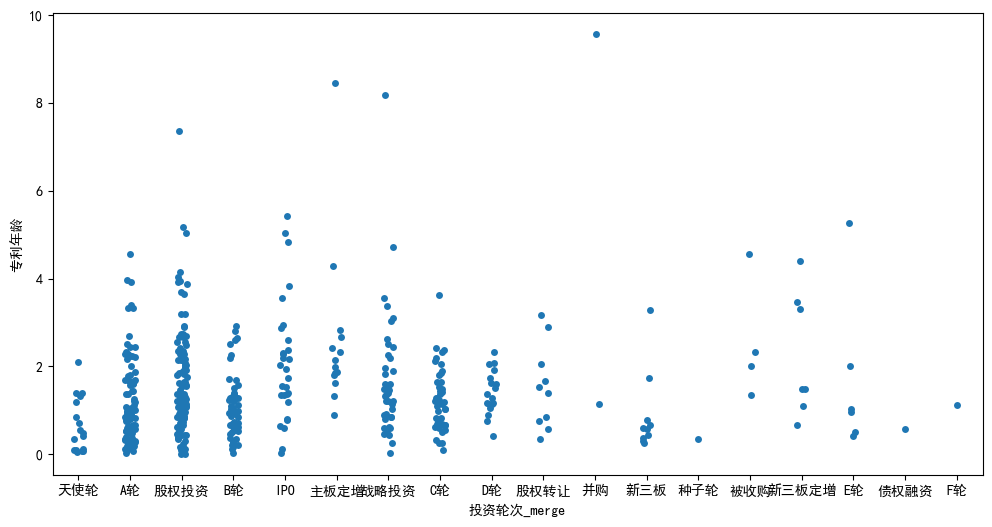

In [99]:
#有些轮次专利不多
plt.figure(figsize=(12,6))
sns.stripplot(ABO,x='投资轮次_merge',y='专利年龄')

<Axes: xlabel='投资轮次_merge', ylabel='年度自引次数_平均'>

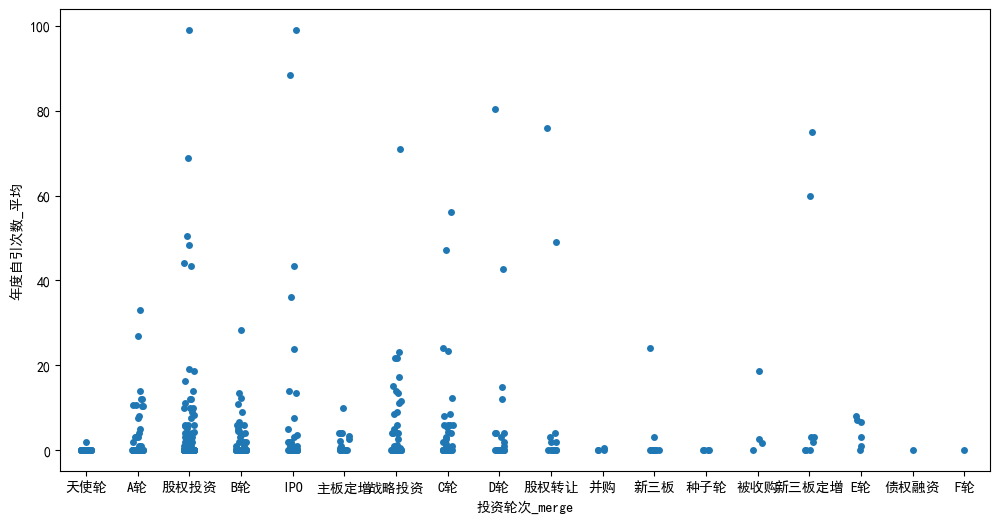

In [100]:
plt.figure(figsize=(12,6))
sns.stripplot(ABO,x='投资轮次_merge',y='年度自引次数_平均')

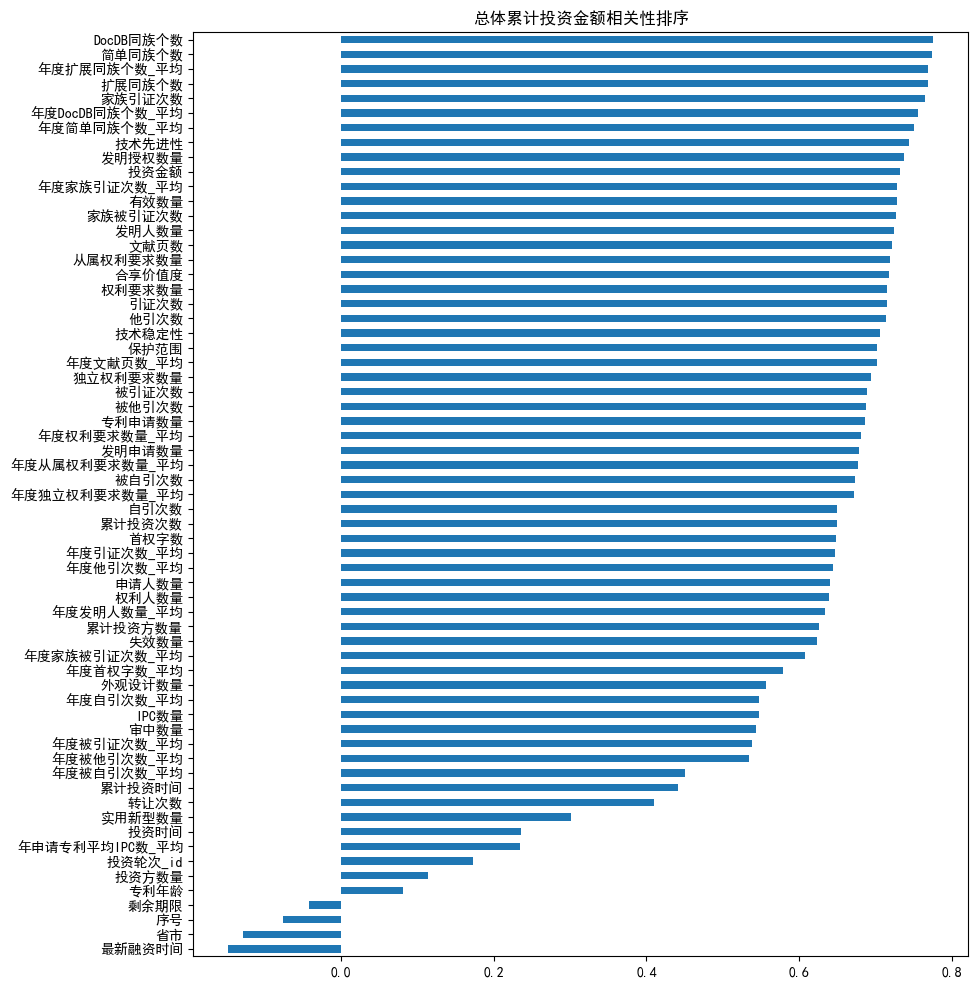

In [101]:
#专利年龄，剩余期限由于计算的是均值，无专利数量影响
corr['累计投资金额'].sort_values()[:-1].plot.barh(figsize=(10,12),title='总体累计投资金额相关性排序')
plt.savefig('data\\累计投资金额相关性排序.png')

<Axes: title={'center': '种子轮,天使轮累计投资金额相关性排序'}>

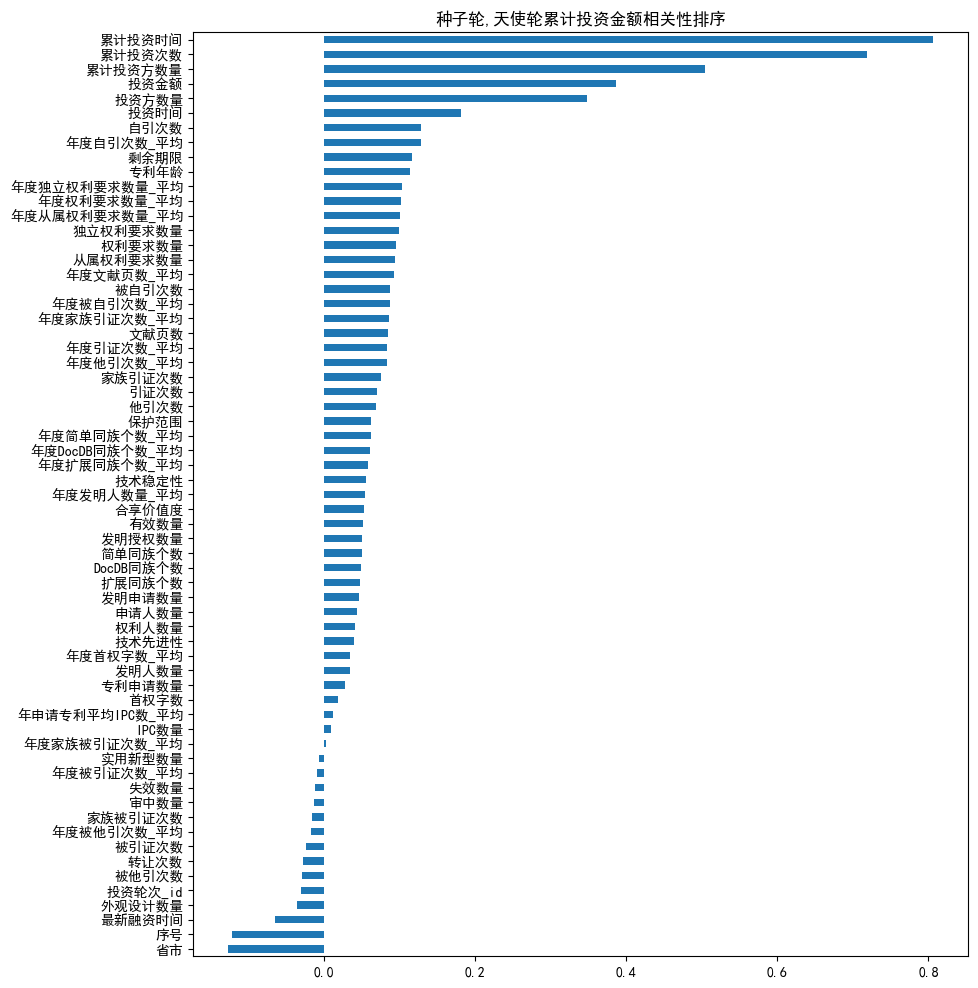

In [102]:
#134,筛选有专利只剩下19 专利申请数量>0 groupby('公司全称').filter(lambda x: x['专利申请数量'].sum()>0)
corr=dl_invest_round.query('投资轮次_merge in ["种子轮","天使轮"]').select_dtypes(exclude='object').corr()
corr['累计投资金额'].sort_values()[:-1].plot.barh(figsize=(10,12),title='种子轮,天使轮累计投资金额相关性排序')

<Axes: title={'center': '2010年前累计投资金额相关性排序'}>

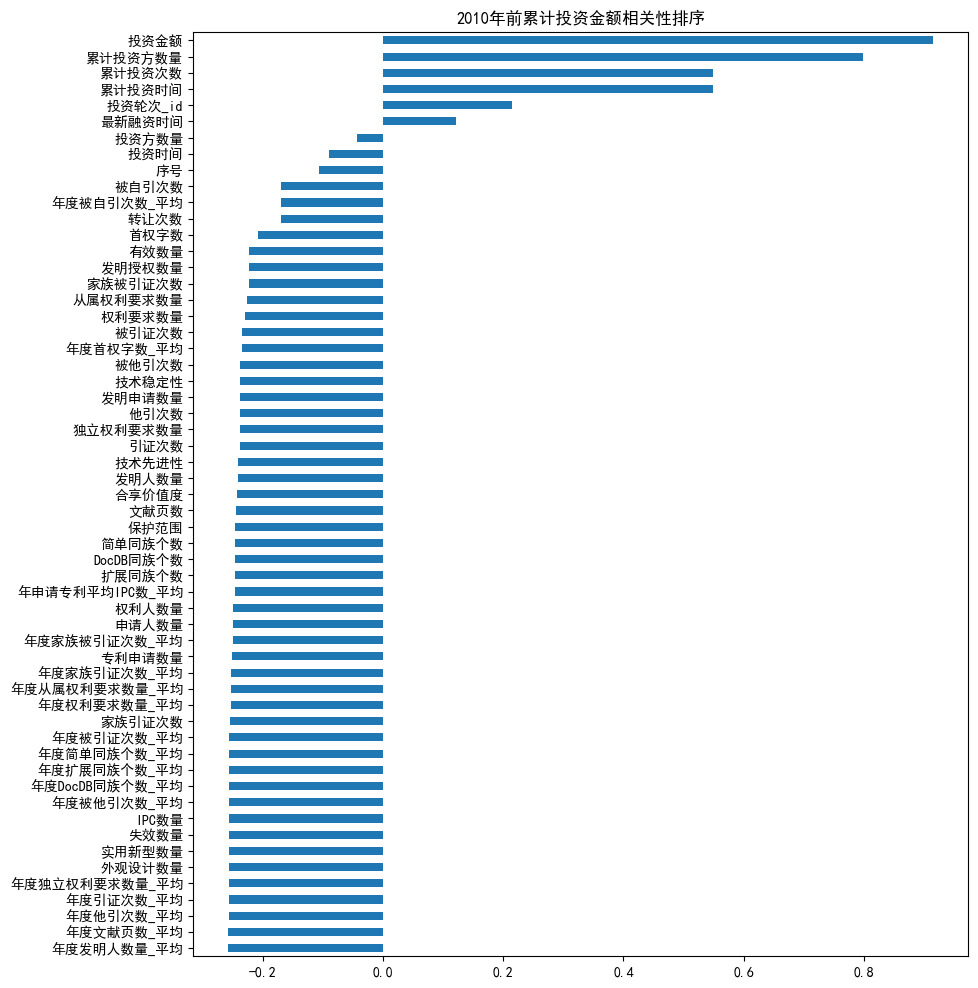

In [103]:
#28，大部分na
corr=dl_invest_round.query('投资时间 < 2010').select_dtypes(exclude='object').corr()
corr.loc[corr['累计投资金额']<0.99,'累计投资金额'].sort_values().plot.barh(figsize=(10,12),title='2010年前累计投资金额相关性排序')

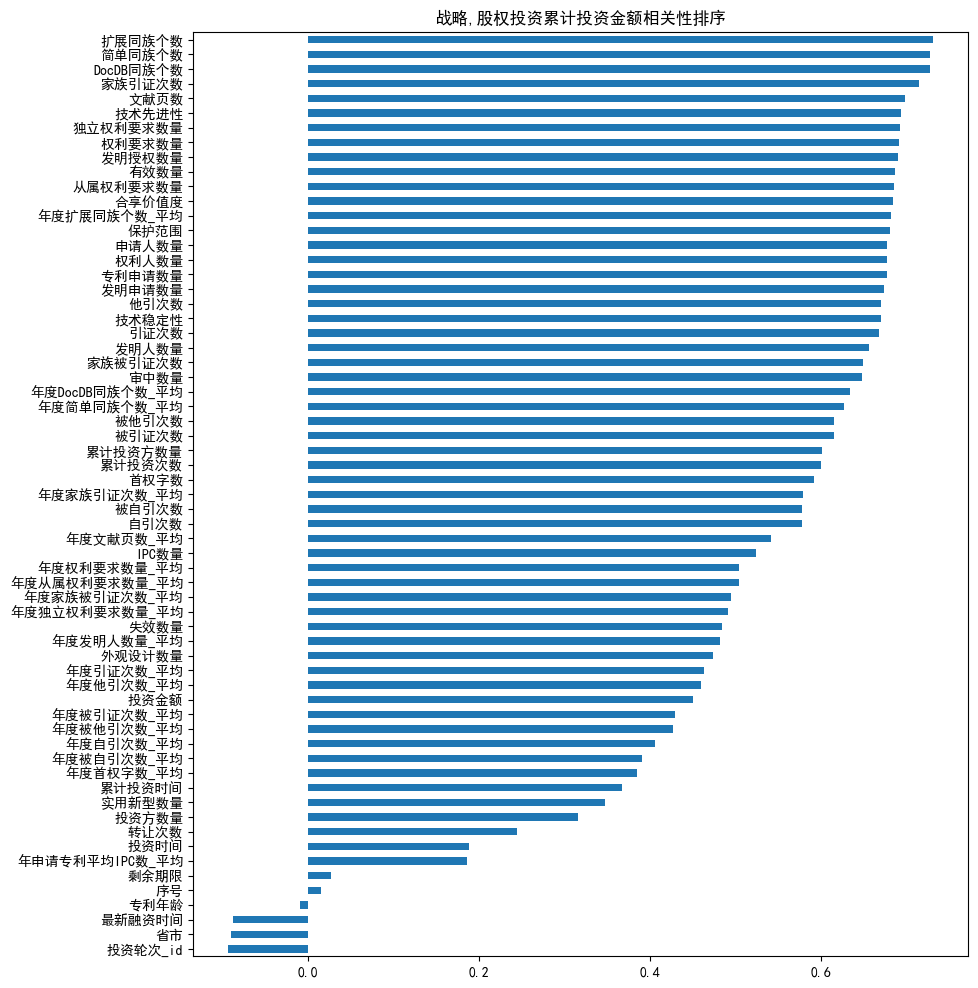

In [104]:
#285,181 and 专利申请数量>0
dl_invest_limit=dl_invest_round.query('投资轮次_merge in ["战略投资","股权投资"]').groupby('公司全称').filter(lambda x: x['专利申请数量'].sum()>0)
corr=dl_invest_limit.select_dtypes(exclude='object').corr()
corr['累计投资金额'].sort_values()[:-1].plot.barh(figsize=(10,12),title='战略,股权投资累计投资金额相关性排序')
plt.savefig('data\\战略,股权投资累计投资金额相关性排序.png')

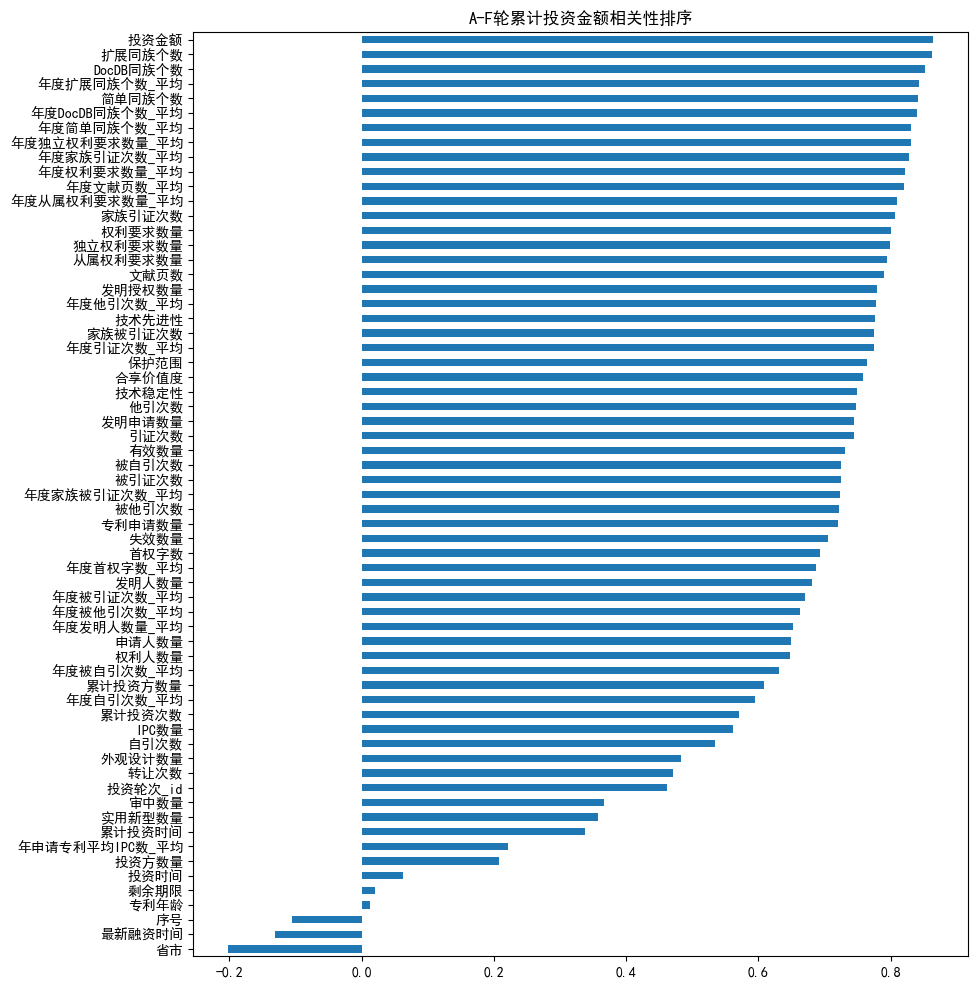

In [105]:
#550,296
dl_invest_limit=dl_invest_round.query('投资轮次_id < 7').groupby('公司全称').filter(lambda x: x['专利申请数量'].sum()>0)
corr=dl_invest_limit.select_dtypes(exclude='object').corr()
corr['累计投资金额'].sort_values()[:-1].plot.barh(figsize=(10,12),title='A-F轮累计投资金额相关性排序')
plt.savefig('data\\A-F轮累计投资金额相关性排序.png')

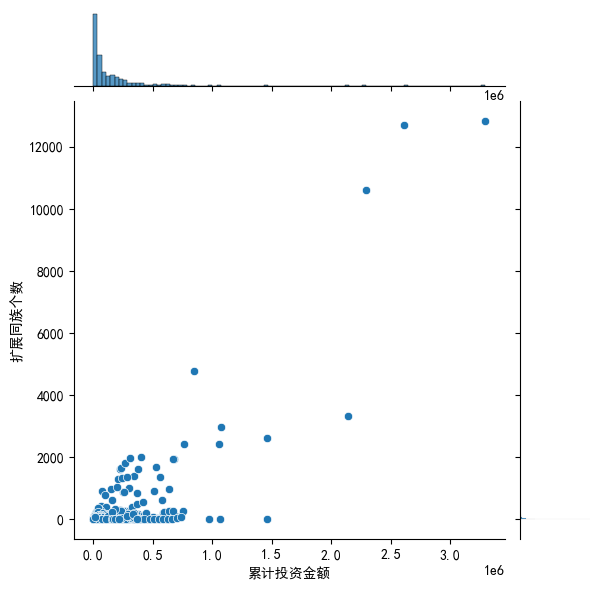

In [106]:
sns.jointplot(ABO,x='累计投资金额',y='扩展同族个数')

In [107]:
import sklearn.metrics as sm
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor

In [108]:
#不考虑投资金额
data=ABO.select_dtypes(exclude=['object','datetime']).fillna(0).copy()
y=data['累计投资金额']
X=data.loc[:,:'申请人数量'] #sd.fit_transform
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
X.shape

(705, 60)

In [109]:
model=lm.Lasso(alpha=9000).fit(X_train,y_train)
pred_y_train=model.predict(X_train)
pred_y_test=model.predict(X_test)
print(sm.r2_score(y_train,pred_y_train),sm.r2_score(y_test,pred_y_test))

0.8463900789808294 0.7985060398331528


In [110]:
print((model.coef_!=0).sum(),X.columns[model.coef_==0])

56 Index(['IPC数量', '年申请专利平均IPC数_平均', '投资方数量', '失效数量'], dtype='object')


In [111]:
#只有专利信息没有投资信息预测效果不好
model.fit(X,y)
data_b=pd.concat([BO,ABA]).query('投资时间=="2023-09-30"')
pred_y=model.predict(data_b.select_dtypes(exclude=['object','datetime']).loc[:,:'申请人数量'].fillna(0))
(pred_y<0).sum()

48

In [112]:
#考虑历史投资金额
X['历史累计投资金额']=data['累计投资金额']-data['投资金额']#groupby('公司全称')['投资金额'].transform(lambda x: x.shift(1).cumsum())
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
X.shape

(705, 61)

In [113]:
model=lm.Lasso(alpha=10000).fit(X_train,y_train)
pred_y_train=model.predict(X_train)
pred_y_test=model.predict(X_test)
print(sm.r2_score(y_train,pred_y_train),sm.r2_score(y_test,pred_y_test))

0.9574657578294515 0.9622536119142551


In [114]:
X.columns[model.coef_==0]

Index(['IPC数量', '年申请专利平均IPC数_平均', '年度引证次数_平均', '累计投资次数', '投资方数量', '累计投资方数量',
       '专利年龄', '剩余期限', '年度被引证次数_平均', '被他引次数', '年度家族引证次数_平均', '年度权利要求数量_平均',
       '年度简单同族个数_平均', '年度扩展同族个数_平均', '实用新型数量', '审中数量'],
      dtype='object')

In [115]:
#for i in range(2,33):
model_rf = RandomForestRegressor(n_estimators=30, max_depth=8,random_state=123).fit(X_train,y_train)
pred_y_train=model_rf.predict(X_train)
pred_y_test=model_rf.predict(X_test)
print(sm.r2_score(y_train,pred_y_train),sm.r2_score(y_test,pred_y_test))

0.981479418847486 0.9126421512424189


<Axes: title={'center': '累计投资金额_rf_feature_importances'}>

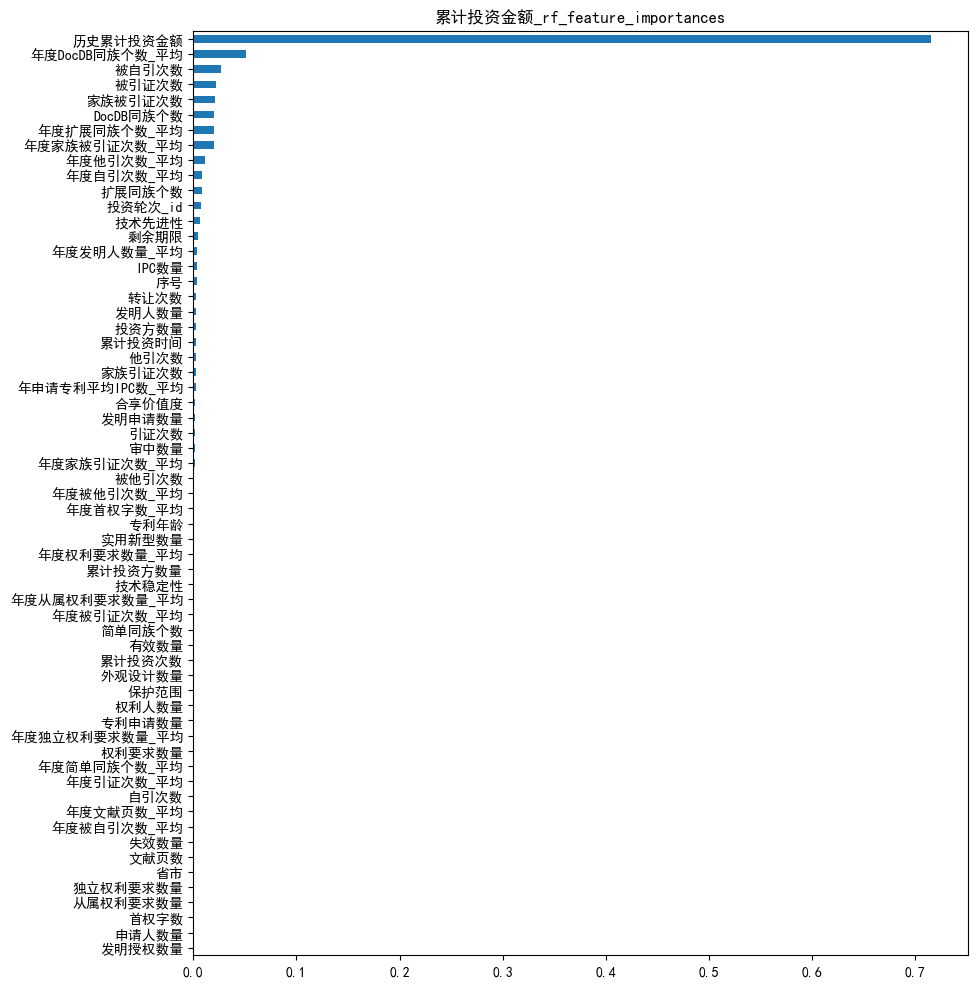

In [116]:
model_rf.fit(X,y)#data.loc[:,:'投资金额'].columns
pd.Series(model_rf.feature_importances_,index=X.columns).sort_values().plot.barh(figsize=(10,12),title='累计投资金额_rf_feature_importances')

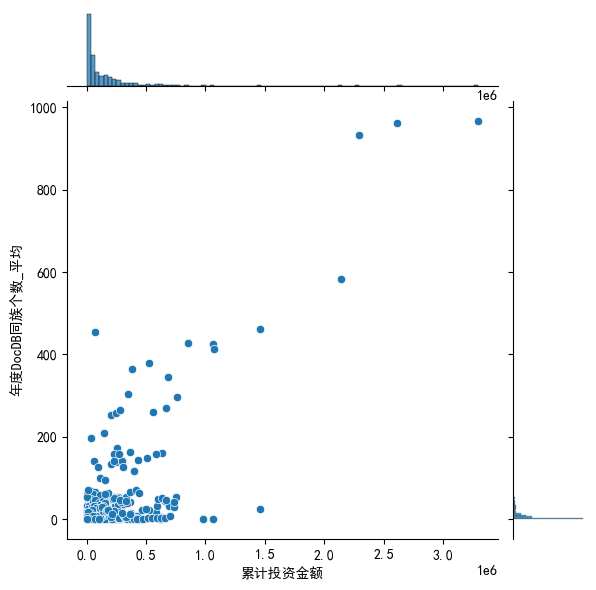

In [117]:
sns.jointplot(ABO,x='累计投资金额',y='年度DocDB同族个数_平均')

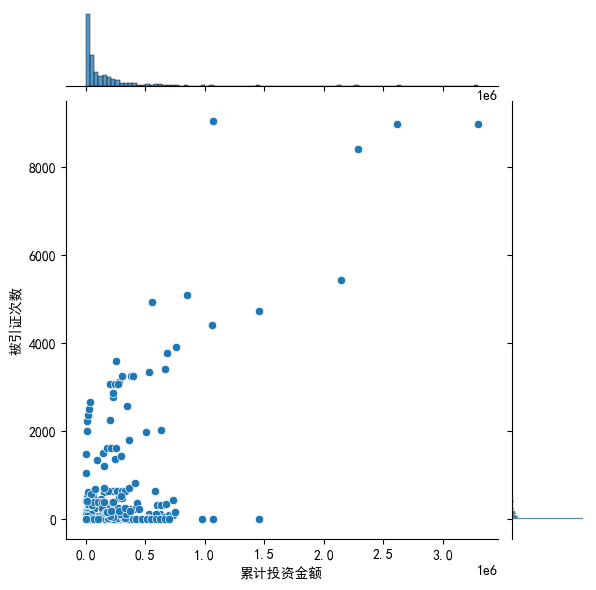

In [118]:
sns.jointplot(ABO,x='累计投资金额',y='被引证次数')

In [119]:
pred_y=model_rf.predict(X)
print(sm.r2_score(y,pred_y),sm.mean_absolute_error(y,pred_y))

0.9862697095063853 15855.60221538361


In [120]:
data['预测累计投资金额']=pred_y
data['预测融资金额']=pred_y-X['历史累计投资金额']#data['预测累计投资金额']'预测累计投资金额']-data['累计投资金额']+data['投资金额']
sm.r2_score(data['投资金额'],data['预测融资金额'])

0.8170156674953194

In [121]:
#专利信息不足，用历史累计投资金额
data_a=pd.concat([AO.query('投资轮次_id>0'),ABA.query('投资轮次_id>0'),ABO.query('投资轮次_merge in ["种子轮","天使轮"] or 投资时间 < 2010')])
data_1=data_a.select_dtypes(exclude=['object','datetime']).fillna(0).copy()
y=data_1['累计投资金额']
X=data_1.loc[:,:'申请人数量'] #sd.fit_transform
X['历史累计投资金额']=data_1['累计投资金额']-data_1['投资金额']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
X.shape

(502, 61)

In [122]:
model=lm.Lasso(alpha=9000).fit(X_train,y_train)
pred_y_train=model.predict(X_train)
pred_y_test=model.predict(X_test)
print(sm.r2_score(y_train,pred_y_train),sm.r2_score(y_test,pred_y_test))

0.8717661412012705 0.9435976625394247


In [123]:
#Lasso选择特征
X=X.iloc[:,model.coef_!=0]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
model_rf = RandomForestRegressor(n_estimators=30, max_depth=8,random_state=123).fit(X_train,y_train)
pred_y_train=model_rf.predict(X_train)
pred_y_test=model_rf.predict(X_test)
print(sm.r2_score(y_train,pred_y_train),sm.r2_score(y_test,pred_y_test))

0.9849318541446304 0.9199322881706378


<Axes: title={'center': '累计投资金额_rf_feature_importances'}>

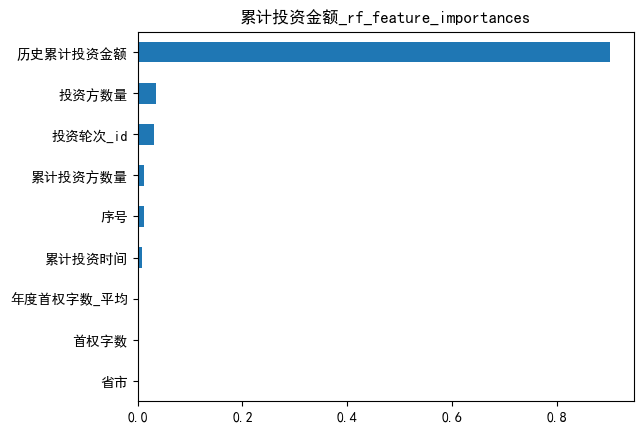

In [124]:
model_rf.fit(X,y)#data.loc[:,:'投资金额'].columns
pd.Series(model_rf.feature_importances_,index=X.columns).sort_values().plot.barh(title='累计投资金额_rf_feature_importances')

In [125]:
pred_y=model_rf.predict(X)
print(sm.r2_score(y,pred_y),sm.mean_absolute_error(y,pred_y))

0.9830638342365696 14012.571325306284


In [126]:
data_1['预测累计投资金额']=pred_y
data_1['预测融资金额']=pred_y-X['历史累计投资金额']#data['预测累计投资金额']'预测累计投资金额']-data['累计投资金额']+data['投资金额']
sm.mean_absolute_error(data_1['投资金额'],data_1['预测融资金额'])

14012.571325306284

In [127]:
#index
pred_0=pd.concat([ABO.select_dtypes(['object','datetime']),data],axis=1).query('投资轮次_merge not in ["种子轮","天使轮"] and 投资时间 >= 2010')
pred_1=pd.concat([data_a.select_dtypes(['object','datetime']),data_1],axis=1)

In [128]:
pred_data=pd.concat([pred_0,pred_1]).sort_values(by=['序号','投资时间'])
print(sm.r2_score(pred_data['累计投资金额'],pred_data['预测累计投资金额']),sm.mean_absolute_error(pred_data['投资金额'],pred_data['预测融资金额']))

0.9848001604127672 15829.09728758124


In [129]:
pred_data.query('序号==220')

,公司全称,公司名,简介,烯牛行业（一级）,最新融资时间,最新融资轮次,最新融资金额,投资方,投资时间,投资轮次名称,...,实用新型数量,有效数量,审中数量,失效数量,权利人数量,申请人数量,投资金额,累计投资金额,预测累计投资金额,预测融资金额
1163,上海星图金融服务集团有限公司,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2016-04-25,战略投资,...,0,0,0,0,0,0,666700.000000,6.667000e+05,4.684585e+05,468458.545170
1164,上海星图金融服务集团有限公司,苏宁金服,消费金融服务平台,金融,2019-09-27,C轮,未披露,苏宁金控，金浦投资，新华联集团，兴捷瑞辰投资,2017-12-26,战略投资,...,0,0,0,0,0,0,533500.000000,1.200200e+06,1.048300e+06,381599.695854
1165,上海星图金融服务集团有限公司,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2018-12-28,战略投资,...,0,0,0,0,0,0,1000000.000000,2.200200e+06,1.925202e+06,725001.711963
1166,上海星图金融服务集团有限公司,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2019-09-27,C轮,...,0,0,0,0,0,0,52920.963925,2.253121e+06,1.973425e+06,-226775.478247


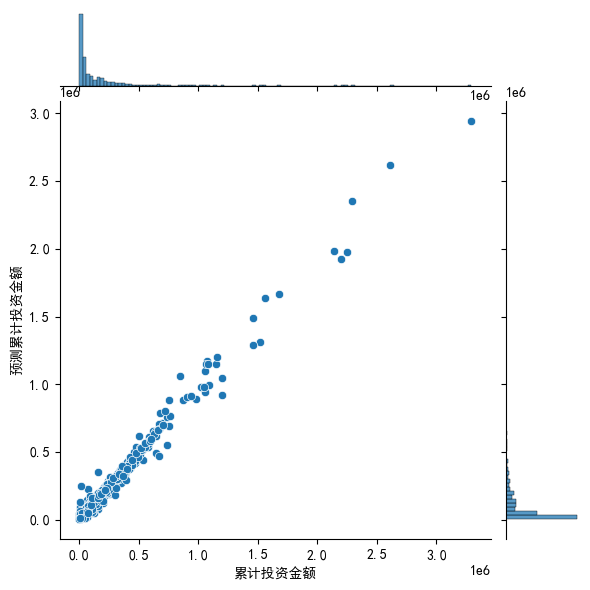

In [130]:
sns.jointplot(data=pred_data,x='累计投资金额',y='预测累计投资金额')

<Axes: xlabel='投资时间'>

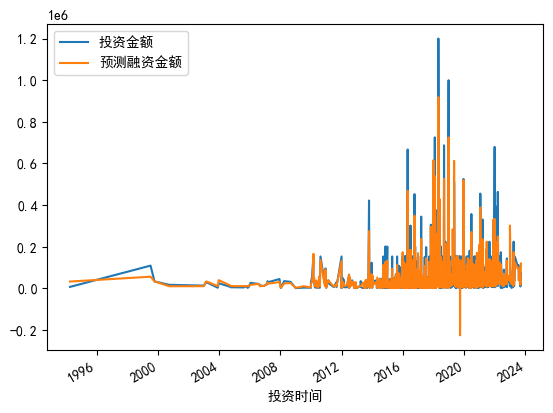

In [131]:
pred_data[['投资时间','投资金额','预测融资金额']].set_index('投资时间').sort_index().plot()

<Axes: title={'center': '累计投资金额与预测'}, xlabel='投资时间'>

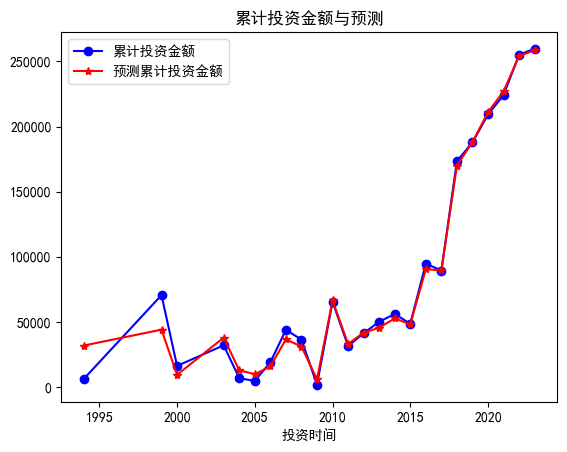

In [132]:
pred_data.groupby(by=dl_invest_round.投资时间.dt.year)[['累计投资金额','预测累计投资金额']].mean().plot(title='累计投资金额与预测',style=['b-o','r-*'])

<Axes: xlabel='投资轮次_merge'>

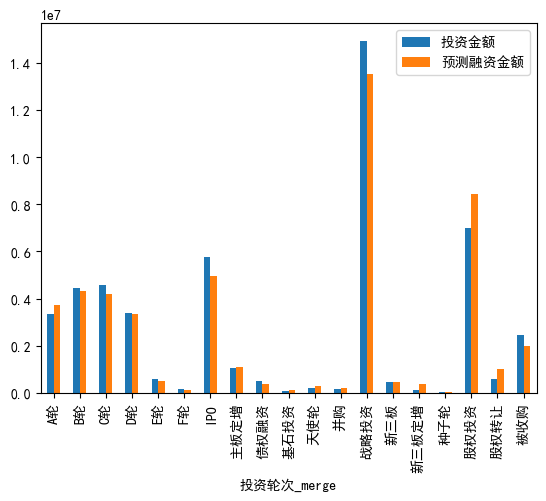

In [133]:
pred_data.groupby('投资轮次_merge')[['投资金额','预测融资金额']].sum().plot.bar()

In [134]:
pred_data.to_excel('data\\内地金融科技企业投资预测.xlsx')
pred_data[pred_data.公司全称==pred_data.公司全称.mode()[0]].filter(like="资")

,最新融资时间,最新融资轮次,最新融资金额,投资方,投资时间,投资轮次名称,转换后投资金额,投资方.1,投资方.2,投资轮次_merge,累计投资时间,累计投资次数,投资方数量,累计投资方数量,投资轮次_id,投资金额,累计投资金额,预测累计投资金额,预测融资金额
1802,NaT,NaN,NaN,NaN,2015-10-16,天使轮,数百万元,红杉中国，金石投资,红杉中国;金石投资,天使轮,0.0,1.0,2,2.0,11.0,500.000000,5.000000e+02,1.583962e+03,1583.961808
1803,2023-09-18,基石投资,1亿美元,新华资本，中关村科学城，澜起科技,2016-11-28,A轮,数百万美元,创新工场，红杉中国，峰尚资本,创新工场;红杉中国;峰尚资本,A轮,409.0,2.0,3,5.0,1.0,3462.800000,3.962800e+03,1.132355e+04,10823.547399
1804,NaT,NaN,NaN,NaN,2017-12-19,B轮,未披露,元生资本、众为资本领投，光控众盈资本、昊翔资本、领沨资本、国新启迪跟投,元生资本;众为资本;光控众盈资本;昊翔资本;领沨资本;国新启迪,B轮,795.0,3.0,6,11.0,2.0,28823.247196,3.278605e+04,2.890027e+04,24937.474325
1805,NaT,NaN,NaN,NaN,2018-01-27,B+轮,未披露,中国工商银行，中国银行，中国建设银行,中国工商银行;中国银行;中国建设银行,B轮,834.0,4.0,3,14.0,2.0,30178.583334,6.296463e+04,5.816840e+04,25382.350333
1806,NaT,NaN,NaN,NaN,2018-12-19,C轮,10亿元,国新启迪，保利资本，三峡鑫泰基金，中信证券投资，红杉中国，中国农业银行，交通银行，渤海中盛,国新启迪;保利资本;三峡鑫泰基金;中信证券投资;红杉中国;中国农业银行;交通银行;渤海中盛,C轮,1160.0,5.0,8,22.0,3.0,100000.000000,1.629646e+05,1.464417e+05,83477.080376
1807,NaT,NaN,NaN,NaN,2019-04-28,战略投资,未披露,广州越秀产业基金，金石投资，中互金投资基金管理，睿浤投资,广州越秀产业基金;金石投资;中互金投资基金管理;睿浤投资,战略投资,1290.0,6.0,4,26.0,13.0,152351.280513,3.153159e+05,2.963176e+05,133352.987673
1808,NaT,NaN,NaN,NaN,2020-04-02,C+轮,未披露,思科，中信银行，联想，松禾资本，基石资本,思科;中信银行;联想;松禾资本;基石资本,C轮,1630.0,7.0,5,31.0,3.0,88626.073444,4.039420e+05,3.953185e+05,80002.624780
1809,NaT,NaN,NaN,NaN,2020-10-21,股权投资,未披露,信银投资，农银国际，中信证券，睿浤投资,信银投资;农银国际;中信证券;睿浤投资,股权投资,1832.0,8.0,4,35.0,17.0,37477.886598,4.414199e+05,4.366391e+05,32697.150463
1810,NaT,NaN,NaN,NaN,2021-01-04,股权投资,未披露,昊容投资,昊容投资,股权投资,1907.0,9.0,1,36.0,17.0,37477.886598,4.788978e+05,4.928456e+05,51425.730431
1811,NaT,NaN,NaN,NaN,2021-01-11,股权投资,未披露,熙诚金睿,熙诚金睿,股权投资,1914.0,10.0,1,37.0,17.0,37477.886598,5.163756e+05,5.261743e+05,47276.502722


In [135]:
import re
#中文分词
import jieba
pattern_re=re.compile(pattern='[\u4e00-\u9fa5]+')

In [136]:
#'、'.join(dl_patent['标题 (中文)']).split('、')
#[doc.split('、') for doc in dl_patent['标题 (中文)']]
#dl_patent['标题 (中文)'].str.extract('([\u4e00-\u9fa5]+)')
#dl_patent['标题 (中文)'].str.split('、')
#dl_patent['标题 (中文)'].apply(lambda x:re.findall(pattern=pattern_re,string=x))
dl_patent['标题 (中文)'].apply(lambda x:";".join(re.findall(pattern=pattern_re,string=x))).str.split(';',expand=True)

0       0    基于联邦训练的梯度提升树模型构建方法
        1               装置及存储介质
1       0         基于联邦训练的样本预测方法
        1               装置及存储介质
2       0        一种目标员工的选取方法及设备
                    ...        
113073  0                硬币出币装置
113075  0             银行自助服务终端机
113086  0            连续票据自动剪切装置
113087  0             立式自助服务终端机
113088  0             弧形自助服务终端机
Length: 90472, dtype: object

In [137]:
filterdata=["".join(re.findall(pattern=pattern_re,string=doc)) for doc in dl_patent['标题 (中文)']]
segment=jieba.lcut("".join(filterdata),cut_all=False)
segment

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Prime\AppData\Local\Temp\jieba.cache
Loading model cost 0.739 seconds.
Prefix dict has been built successfully.


['基于',
 '联邦',
 '训练',
 '的',
 '梯度',
 '提升',
 '树',
 '模型',
 '构建',
 '方法',
 '装置',
 '及',
 '存储介质',
 '基于',
 '联邦',
 '训练',
 '的',
 '样本',
 '预测',
 '方法',
 '装置',
 '及',
 '存储介质',
 '一种',
 '目标',
 '员工',
 '的',
 '选取',
 '方法',
 '及',
 '设备',
 '一种',
 '基于',
 '大',
 '数据',
 '的',
 '保险业务',
 '处理',
 '方法',
 '及',
 '系统',
 '一种',
 '处理',
 '交易',
 '数据',
 '的',
 '方法',
 '及',
 '装置',
 '作业',
 '提交',
 '执行',
 '方法',
 '装置',
 '设备',
 '及',
 '计算机',
 '存储介质',
 '一种',
 '监控',
 '分布式',
 '存储系统',
 '的',
 '方法',
 '及',
 '装置',
 '基于',
 '知识',
 '图谱',
 '的',
 '数据处理',
 '方法',
 '装置',
 '和',
 '计算机设备',
 '一种',
 '热词',
 '的',
 '添加',
 '方法',
 '和',
 '装置',
 '语料',
 '扩充',
 '方法',
 '装置',
 '计算机设备',
 '和',
 '存储介质',
 '页面',
 '篡改',
 '检测',
 '方法',
 '装置',
 '终端',
 '及',
 '存储介质',
 '批量',
 '数据处理',
 '方法',
 '装置',
 '终端设备',
 '及',
 '存储介质',
 '一种',
 '目标',
 '跟踪',
 '方法',
 '装置',
 '设备',
 '及',
 '存储介质',
 '信息',
 '抽取',
 '方法',
 '装置',
 '计算机设备',
 '和',
 '存储介质',
 '一种',
 '关联',
 '问句',
 '推荐',
 '方法',
 '装置',
 '设备',
 '及',
 '可读',
 '存储介质',
 '自动',
 '生成',
 '演示',
 '视频',
 '的',
 '方法',
 '系统',
 '设备',
 '及',
 '存储介质',
 '业务',
 '日志',

In [138]:
stopwords=pd.read_csv('data\chineseStopWords.txt',encoding='utf-8',names=['stopwords'])
# word_df=pd.DataFrame({'segment':segment})
# word_df_data=word_df[~word_df.segment.isin(stopwords.stopwords)]
# {x[0]:x[1] for x in word_df_data.value_counts().reset_index().values}
from collections import Counter,defaultdict
Counter([x for x in segment if x not in stopwords])

Counter({'方法': 34680,
         '装置': 28661,
         '及': 27111,
         '的': 18743,
         '存储介质': 17411,
         '一种': 13001,
         '和': 10095,
         '设备': 9512,
         '电子设备': 8181,
         '系统': 7856,
         '基于': 5364,
         '数据': 4083,
         '计算机': 3178,
         '介质': 2964,
         '计算机设备': 2954,
         '处理': 2847,
         '可': 2627,
         '读': 2471,
         '检测': 2415,
         '模型': 2054,
         '生成': 1876,
         '数据处理': 1821,
         '链': 1781,
         '区块': 1766,
         '识别方法': 1583,
         '可读': 1467,
         '信息': 1396,
         '图形用户界面': 1391,
         '服务器': 1292,
         '以及': 1273,
         '语音': 1230,
         '训练方法': 1210,
         '显示': 1195,
         '图像': 1194,
         '相关': 1159,
         '智能': 1134,
         '用于': 1134,
         '管理': 1025,
         '产品': 960,
         '图像处理': 946,
         '面板': 943,
         '终端': 939,
         '屏幕': 930,
         '文本': 874,
         '学习': 816,
         '业务': 776,
         '终端设备': 769

In [139]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout

In [140]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 3))
sd = StandardScaler()
le = LabelEncoder()
d = defaultdict(LabelEncoder)#数值化

In [141]:
le.fit_transform([x for x in segment if x not in stopwords])

array([2126, 6041, 6517, ..., 6151, 4123, 5818], dtype=int64)

In [142]:
data=dl_invest_round.query('投资时间<"2023-09-30"').copy()
obj_values=data.select_dtypes(include=['object','datetime']).apply(lambda x : d[x.name].fit_transform(x))
obj_values

,公司全称,公司名,简介,烯牛行业（一级）,最新融资时间,最新融资轮次,最新融资金额,投资方,投资时间,投资轮次名称,转换后投资金额,投资方.1,成员名,投资方.2,邮编,地市,区县,投资轮次_merge,工商企业状态
1,214,178,157,52,203,28,67,126,144,34,209,458,790,456,114,23,60,10,7
2,214,257,247,55,239,31,68,224,298,4,205,768,790,763,114,23,60,0,7
3,214,257,247,55,239,31,68,224,712,40,209,767,790,762,91,16,55,16,1
4,214,257,247,55,239,31,68,224,785,40,209,511,790,508,91,16,55,16,1
5,214,257,247,55,239,31,68,224,833,40,209,478,790,475,104,16,55,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,144,108,91,33,48,4,11,12,266,34,209,451,761,449,114,23,60,10,7
1913,144,257,247,55,239,31,68,224,401,41,0,668,790,664,37,0,58,17,3
1914,144,257,247,55,239,31,68,224,418,4,31,56,790,56,37,0,58,0,3
1917,213,167,133,27,35,17,64,224,244,34,23,266,473,265,114,23,60,10,7


In [143]:
#d['公司全称'].inverse_transform(obj_values['公司全称'])
obj_values.apply(lambda x: d[x.name].inverse_transform(x))

,公司全称,公司名,简介,烯牛行业（一级）,最新融资时间,最新融资轮次,最新融资金额,投资方,投资时间,投资轮次名称,转换后投资金额,投资方.1,成员名,投资方.2,邮编,地市,区县,投资轮次_merge,工商企业状态
1,珠海盈米基金销售有限公司,盈米基金,理财及基金销售服务提供商,金融,2022-07-06,股权投资,未披露,德物沐华，高成资本,2015-05-01,天使轮,未披露,广发信德,NaN,广发信德,NaN,NaN,NaN,天使轮,None
2,珠海盈米基金销售有限公司,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2017-01-01,A轮,数千万元,考拉基金领投，华西股份、横琴金投产业投资基金管理跟投,NaN,考拉基金;华西股份;横琴金投产业投资基金管理,NaN,NaN,NaN,A轮,None
3,珠海盈米基金销售有限公司,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2020-12-25,股权投资,未披露,考拉基金,NaN,考拉基金,510308,珠海,香洲,股权投资,在营(开业)企业
4,珠海盈米基金销售有限公司,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2021-10-08,股权投资,未披露,斯扬道（天津）科技发展合伙企业（有限合伙），广发乾和,NaN,斯扬道（天津）科技发展合伙企业（有限合伙）;广发乾和,510308,珠海,香洲,股权投资,在营(开业)企业
5,珠海盈米基金销售有限公司,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2022-07-06,股权投资,未披露,德物沐华，高成资本,NaN,德物沐华;高成资本,519000,珠海,香洲,股权投资,在营(开业)企业
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,平安医疗健康管理股份有限公司,平安医保科技,医保/商保管理平台,医疗\n企业服务\n大数据\n金融,2018-02-02,A轮,11.5亿美元,Vision Fund等,2016-09-22,天使轮,未披露,平安创投,高菁,平安创投,NaN,NaN,NaN,天使轮,None
1913,平安医疗健康管理股份有限公司,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2017-12-26,股权转让,1.01亿元,爱尔眼科,NaN,爱尔眼科,200001,上海,黄浦,股权转让,存续(在营、开业、在册)
1914,平安医疗健康管理股份有限公司,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2018-02-02,A轮,11.5亿美元,Vision Fund等,NaN,Vision Fund,200001,上海,黄浦,A轮,存续(在营、开业、在册)
1917,爱因互动科技发展（北京）有限公司,爱因互动,智能对话机器人提供商,先进制造\n企业服务\n人工智能,2017-07-25,Pre-A轮,数千万元,NaN,2016-07-07,天使轮,1000万元,华创资本，翊翎资本，宜信,王守崑,华创资本;翊翎资本;宜信,NaN,NaN,NaN,天使轮,None


In [144]:
all_values = pd.concat([obj_values.astype('float'),data.select_dtypes(exclude=['object','datetime'])],axis=1)
all_values['历史累计投资金额']=all_values['累计投资金额']-all_values['投资金额']
all_values.drop('投资金额', axis=1,inplace=True)
new_cols=all_values.columns.tolist()
new_cols.remove('累计投资金额')
new_cols.append('累计投资金额')
all_values=all_values.reindex(columns=new_cols)
all_values

,公司全称,公司名,简介,烯牛行业（一级）,最新融资时间,最新融资轮次,最新融资金额,投资方,投资时间,投资轮次名称,...,发明授权数量,外观设计数量,实用新型数量,有效数量,审中数量,失效数量,权利人数量,申请人数量,历史累计投资金额,累计投资金额
1,214.0,178.0,157.0,52.0,203.0,28.0,67.0,126.0,144.0,34.0,...,0,0,0,0,0,0,0,0,0.000000,1707.161803
2,214.0,257.0,247.0,55.0,239.0,31.0,68.0,224.0,298.0,4.0,...,0,0,0,0,0,0,0,0,1707.161803,6707.161803
3,214.0,257.0,247.0,55.0,239.0,31.0,68.0,224.0,712.0,40.0,...,1,0,0,1,0,0,1,1,6707.161803,44185.048401
4,214.0,257.0,247.0,55.0,239.0,31.0,68.0,224.0,785.0,40.0,...,1,0,0,1,0,0,1,1,44185.048401,81662.934999
5,214.0,257.0,247.0,55.0,239.0,31.0,68.0,224.0,833.0,40.0,...,3,0,0,3,0,0,5,5,81662.934999,119140.821597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,144.0,108.0,91.0,33.0,48.0,4.0,11.0,12.0,266.0,34.0,...,0,0,0,0,0,0,0,0,0.000000,1707.161803
1913,144.0,257.0,247.0,55.0,239.0,31.0,68.0,224.0,401.0,41.0,...,14,0,0,14,0,13,41,41,1707.161803,11807.161803
1914,144.0,257.0,247.0,55.0,239.0,31.0,68.0,224.0,418.0,4.0,...,17,0,0,17,0,13,47,47,11807.161803,737284.661803
1917,213.0,167.0,133.0,27.0,35.0,17.0,64.0,224.0,244.0,34.0,...,0,0,0,0,0,0,0,0,0.000000,1000.000000


In [145]:
scaled_values = scaler.fit_transform(all_values.fillna(0))
#all_values.columns
scaled_values.shape

(1113, 81)

In [146]:
X_1=scaled_values[:,:-1]
y_1=scaled_values[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X_1,y_1,test_size=0.123,random_state=123)
X_train.shape

(976, 80)

In [147]:
# reshape input to be 3D [samples, timesteps, features]
train_X = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
test_X = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(train_X.shape, y_train.shape, test_X.shape, y_test.shape)

(976, 1, 80) (976,) (137, 1, 80) (137,)


In [148]:
model = Sequential()
model.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(16,activation=None))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='mae', optimizer='adam')

In [149]:
# fit network
history = model.fit(train_X, y_train, epochs=200,batch_size=32, validation_data=(test_X, y_test), verbose=2, shuffle=False)

Epoch 1/200
31/31 - 3s - loss: 0.3412 - val_loss: 0.2152 - 3s/epoch - 100ms/step
Epoch 2/200
31/31 - 0s - loss: 0.1453 - val_loss: 0.0952 - 125ms/epoch - 4ms/step
Epoch 3/200
31/31 - 0s - loss: 0.1201 - val_loss: 0.0926 - 125ms/epoch - 4ms/step
Epoch 4/200
31/31 - 0s - loss: 0.1139 - val_loss: 0.0867 - 125ms/epoch - 4ms/step
Epoch 5/200
31/31 - 0s - loss: 0.1079 - val_loss: 0.0825 - 123ms/epoch - 4ms/step
Epoch 6/200
31/31 - 0s - loss: 0.1022 - val_loss: 0.0774 - 125ms/epoch - 4ms/step
Epoch 7/200
31/31 - 0s - loss: 0.0949 - val_loss: 0.0720 - 123ms/epoch - 4ms/step
Epoch 8/200
31/31 - 0s - loss: 0.0868 - val_loss: 0.0663 - 122ms/epoch - 4ms/step
Epoch 9/200
31/31 - 0s - loss: 0.0782 - val_loss: 0.0614 - 131ms/epoch - 4ms/step
Epoch 10/200
31/31 - 0s - loss: 0.0718 - val_loss: 0.0572 - 123ms/epoch - 4ms/step
Epoch 11/200
31/31 - 0s - loss: 0.0660 - val_loss: 0.0529 - 122ms/epoch - 4ms/step
Epoch 12/200
31/31 - 0s - loss: 0.0635 - val_loss: 0.0511 - 122ms/epoch - 4ms/step
Epoch 13/200
3

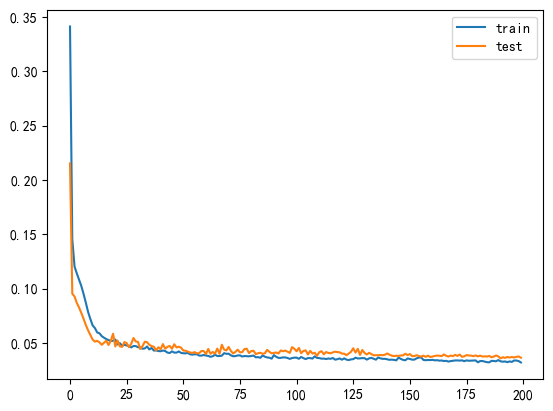

In [150]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [151]:
# make a prediction
yhat = model.predict(test_X)#输出
test_X_1 = test_X.reshape((test_X.shape[0], test_X.shape[2]))
(test_X_1==X_test).all()

5/5 [==============================] - 1s 3ms/step


True

In [152]:
# invert scaling for forecast
inv_yhat = np.concatenate((X_test, yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]

In [153]:
# # invert scaling for actual
inv_y = np.concatenate((X_test,np.expand_dims(y_test,axis=1)), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]
# calculate RMSE
rmse = np.sqrt(sm.mean_squared_error(inv_y, inv_yhat))
mae = sm.mean_absolute_error(inv_y, inv_yhat)
print('Test RMSE: %.3f, MAE: %.3f' %(rmse,mae))

Test RMSE: 91570.377, MAE: 39837.989


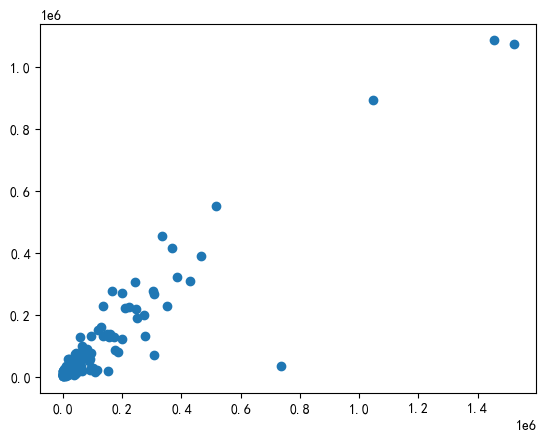

In [155]:
plt.scatter(x=inv_y,y=inv_yhat)#np.stack((inv_y, inv_yhat),axis=1)

In [2]:
import torch
from torch import nn,optim

def normalize_maxnin(x):  # 最大最小值归一化函数
    min = torch.min(x)
    max = torch.max(x)
    return (x - min) / (max - min)

ModuleNotFoundError: No module named 'torch'

In [158]:
#torch.tensor(all_values.values,dtype=torch.float)
torch_data=torch.tensor(scaled_values,dtype=torch.float)

# X_2=torch_data[:,:-1]
# y_2=torch_data[:,-1]
# xtrain,xtest,ytrain,ytest=train_test_split(X_2,y_2,test_size=0.14,random_state=123)
#train_count = 1000 ,torch_data.shape[0]-train_count 
test_count = torch_data.shape[0] // 100 * 10  # 最后留100个数据作为测试用
xtrain = torch_data[:-test_count, :-1]  # 把1000个数据中的900个作为训练的数据x
#xtrain = normalize_maxnin(xtrain) 
ytrain = torch_data[0:-test_count, [-1]]  # 把1000个数据中的900个作为训练的数据y

xtest = torch_data[-test_count:, 0:-1]  # 把1000个数据中的最后100个作为测试数据x
#xtest = normalize_maxnin(xtest)         # 把数据归一化一下
ytest = torch_data[-test_count:, [-1]]  # 把1000个数据中的最后100个作为测试数据y
xtrain.shape

torch.Size([1003, 80])

In [159]:
class Flatten(nn.Module):
    def __init__(self):
        super(Flatten, self).__init__()

    def forward(self, input):
        return input.view(input.size(0), -1)#重构张量的维度(resize),在参数a已知(size)的情况下自动补齐列向量长度

class NetConv(torch.nn.Module):#设计前项运算结果的网络
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Sequential(
	        nn.Conv1d(1,64,3,2,0),#一维卷积，输入厚度，输出厚度（卷积核个数），卷积核尺寸，滑动步数，补零（0，1，
	        nn.ReLU(),
	        nn.Conv1d(64,128,2,2,0),
	        nn.ReLU(),
			nn.Dropout(0.1),#把上一层网络10%神经元随机丢弃
			nn.Conv1d(128, 512, 5, 2, 0),
			nn.ReLU(),  # learning rate 小
	        #nn.Dropout(0.3),#把上一层网络30%神经元随机丢弃
	        #nn.Linear(6, 3),
			Flatten(),  # 铺平
	        nn.Linear(512,1)
        )
    def forward(self, x):# 前向传播
        x=x.unsqueeze(1)# 增添第arg个维度为1(插入填充),删除:squeeze（arg）)
        x = self.conv1(x)
        #sx=8
        return x
        
class Net(torch.nn.Module):#设计前项运算结果的网络
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Sequential(
	        nn.Linear(80,20),
	        nn.ReLU(),
	        nn.Dropout(0.1),
	        nn.Linear(20,10),
	        nn.ReLU(),
	        nn.Dropout(0.3),#把上一层网络30%神经元随机丢弃
	        nn.Linear(10, 3),
	        nn.ReLU(),
	        nn.Linear(3,1)
        )

    def forward(self, x):# 前向传播
        x = self.conv1(x)
        return x

In [160]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
learning_rate = 0.03

#定义一个运算设备，如果电脑有GPU就用GPU运算，如果没有就用CPU运算
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)#把网络模型赋值给model，并且把模型放到GPU上运行
#定义损失函数类型，并且把它放到GPU上运行，mse
criteon = nn.MSELoss().to(device)
#梯度下降算法：总指挥，找到一个按照斜率往下运动的方向，数学实质就是对某变量求偏导。学习率（运动幅度），动量（角度偏移）
optimizer = optim.Adam(model.parameters(),lr=learning_rate)#定义优化方式，梯度下降算法参数调整，非固定momentum，加入L2正则化项，参数weight_decay=0.03
#optimizer=optim.SGD(model.parameters(),lr=learning_rate,momentum=0.3)#Momentum RMSprop
scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.7, patience=9,eps=0.00001,verbose=True)#如果损失函数连续5轮epoch差值都小于0.00001，那么学习率就缩小50%，优化、调整学习率（衰减）

In [168]:
train_epoch = 256
trainlosslist=[]#定义在训练时,累计每个epoch的loss值存储数组
testlosslist=[]#定义在测试时,累计每个epoch的loss值存储数组

plt.ion()#开启plt画图，动态图模式
ax1=plt.subplot(121)
ax2=plt.subplot(122)

for epoch in range(train_epoch):#循环训练200次
    model.train()#切换到训练模式

    xtrain=xtrain.to(device)#把训练x放到GPU上执行
    ytrain=ytrain.to(device)#把训练y放到GPU上执行

    logits=model(xtrain)#通过网络模型的运算，得到预测值
    loss=criteon(logits,ytrain)#通过损失函数的运算，得到损失值

    optimizer.zero_grad()#清空w，b的导数
    loss.backward()#每次网络的W,B全部自动求导计算出导数
    optimizer.step()#根据你定义的梯度下降规则来更新每层网络的W和b

    trainlosslist.append(loss.item())#把这一轮训练计算得出的loss值放入trainlosslist数组
    #scheduler.step(loss) # 执行学习率衰减计划，把他放在epoch循环内

    model.eval()#切换到测试模式
    with torch.no_grad():#测试模式，不需要任何w，b的导数值
        xtest = xtest.to(device)#把测试x放到GPU上执行
        ytest = ytest.to(device)#把测试y放到GPU上执行

        logits = model(xtest)#通过网络模型的运算，得到预测值
        testloss = criteon(logits, ytest)#通过损失函数的运算，得到损失值
        testlosslist.append(testloss.item())#把这一轮测试计算得出的loss值放入testlosslist数组

        if  epoch % 10==0 or epoch == train_epoch - 1:#每10轮画一次图
            ax1.cla()#因为是动态图，所以先擦除上一张图
            l3=ax1.scatter(np.arange(ytest.shape[0]),ytest.to(device='cpu'))#把100个真实结果点画出来
            l4=ax1.scatter(np.arange(logits.shape[0]),logits.to(device='cpu'))#把100个预测结果点画出来
            ax1.legend([l3, l4], ['%d个值的真实结果' % ytest.shape[0], '%d个值的预测结果' % ytest.shape[0]], loc='best')#显示图例
            ax1.text(0.5, 0, '训练次数=%d' % epoch, fontdict={'size': 20, 'color': 'red'})#显示不断更新的训练次数
            
    ax2.cla()#因为是动态图，所以先擦除上一张图
    l1,=ax2.plot(trainlosslist)#把每一轮的训练loss值画出来
    l2,=ax2.plot(testlosslist)#把每一轮的测试loss值画出来
    ax2.legend([l1,l2],['tranloss','testloss'],loc='best')#显示图例
    plt.xlabel('epochs')#画的图x轴，标注epochs字样
    plt.pause(0.1)#暂停0.1秒，以免画的太快感觉不到图在动
    plt.ioff()#结束动态图模式
    
plt.show()  # 最终显示图片
torch.save(model,'data\\torch_invest_patent.pkl')

In [ ]:
model_load = torch.load('data\\torch_invest_patent.pkl')
# x = torch.tensor(scaled_values[:,:-1], dtype=torch.float).to(device)  # 把x的值放到GPU上执行
# x = x.unsqueeze(0)
# y = model_load(x)
pred_y = model_load(xtest) 
#y = y.squeeze(0)  # 减少一个维度
#y = y.argmax(dim=0) 
#pred_y = pred_y.item()
pred_y.squeeze(-1)  

In [ ]:
%matplotlib qt5